# Start of ARIMA

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from sklearn.metrics import mean_squared_error
from math import sqrt
import pmdarima as pm

In [2]:
RMSE_DICT = {}

In [3]:
def plot_diff(data):
    # Plot
    fig, axes = plt.subplots(3, 1, figsize=(20,7), dpi=100, sharex=True)

    # Usual Differencing
    axes[0].plot(data[:], label='Original Series')
    axes[0].set_title('Original Series')
    axes[0].legend(loc='upper left', fontsize=10)

    # Usual Differencing
    axes[1].plot(data[:].diff(1), label='1st Order Diff')
    axes[1].set_title('Daily Seasonality')
    axes[1].legend(loc='upper left', fontsize=10)

    # Seasinal Dei
    axes[2].plot(data[:].diff(7), label='Seasonal Differencing', color='green')
    axes[2].set_title('Weekly Seasonality')
    plt.legend(loc='upper left', fontsize=10)
    plt.suptitle('Open Issues', fontsize=16)
    plt.show()
    
def build_ARIMA(data):
    smodel = pm.auto_arima(data, start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3, m=7,
                             start_P=0, seasonal=True,
                             d=None, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)
    print(smodel.summary())
    return smodel

def predict_ARIMA(smodel, n_periods, data):
    fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    return fitted_series, lower_series, upper_series

def plot_prediction(data, data_df_open, train_len, n_periods, lower_series, upper_series):
    # Plot
    plt.figure(figsize=(20,7))
    plt.plot(data.tail(200))
    plt.plot(data_df_open[train_len:train_len+n_periods])
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("SARIMA - Forecasting")
    plt.show()
    
def model_diagnostics(smodel):
    smodel.plot_diagnostics(figsize=(7,5))
    plt.show()
    
def print_RMSE(data_df_open, fitted_series, train_len, n_periods, exp_no):
    rmse = round(sqrt(mean_squared_error(data_df_open[train_len:train_len+n_periods], fitted_series)),2)
    RMSE_DICT[exp_no] = rmse
    print("The RMSE values for Experiment", exp_no, ":" , rmse)

In [4]:
data_df = pd.read_csv('final_timeseries_df.csv', parse_dates=['Created_date'], index_col='Created_date')

short_input_list = [ 90, 360, 360*2, 360*4 ]
short_output_list = [ 15, 30, 60, 90 ]
experiment_number_list = [ "1."+str(x+1) for x in range(len(short_input_list)* len(short_output_list))]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.1 Input Length: 90 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


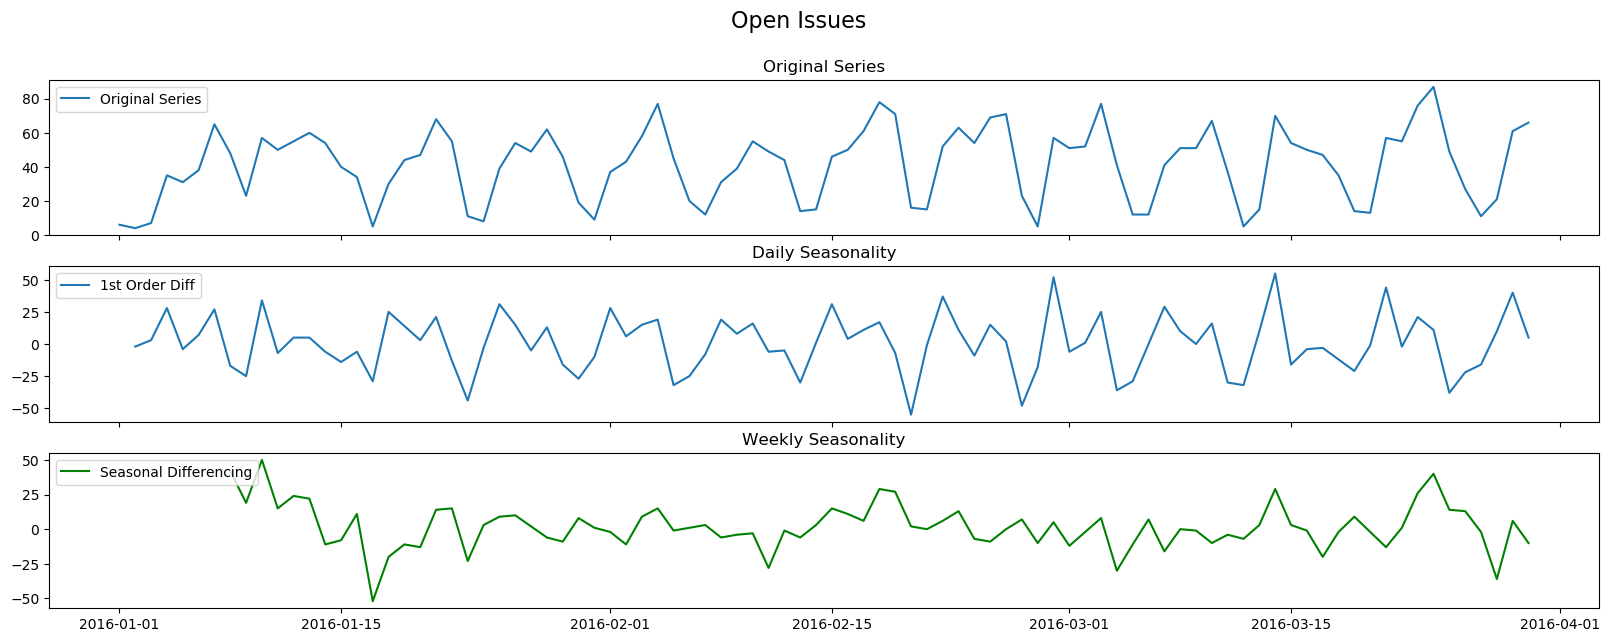

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=701.965, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=677.065, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=700.808, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=695.359, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=673.449, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=680.581, Time=0.11 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=675.396, Time=0.19 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=674.406, Time=0.21 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=672.618, Time=0.16 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=676.372, Time=0.07 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=0.35 sec
 A

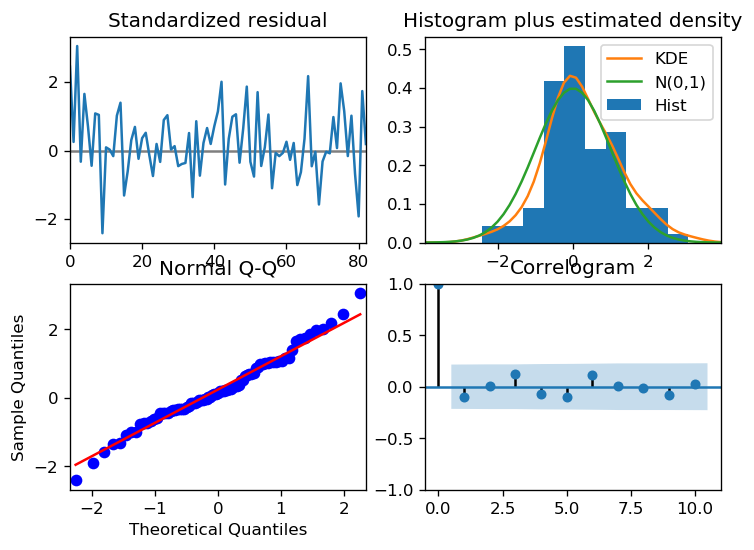

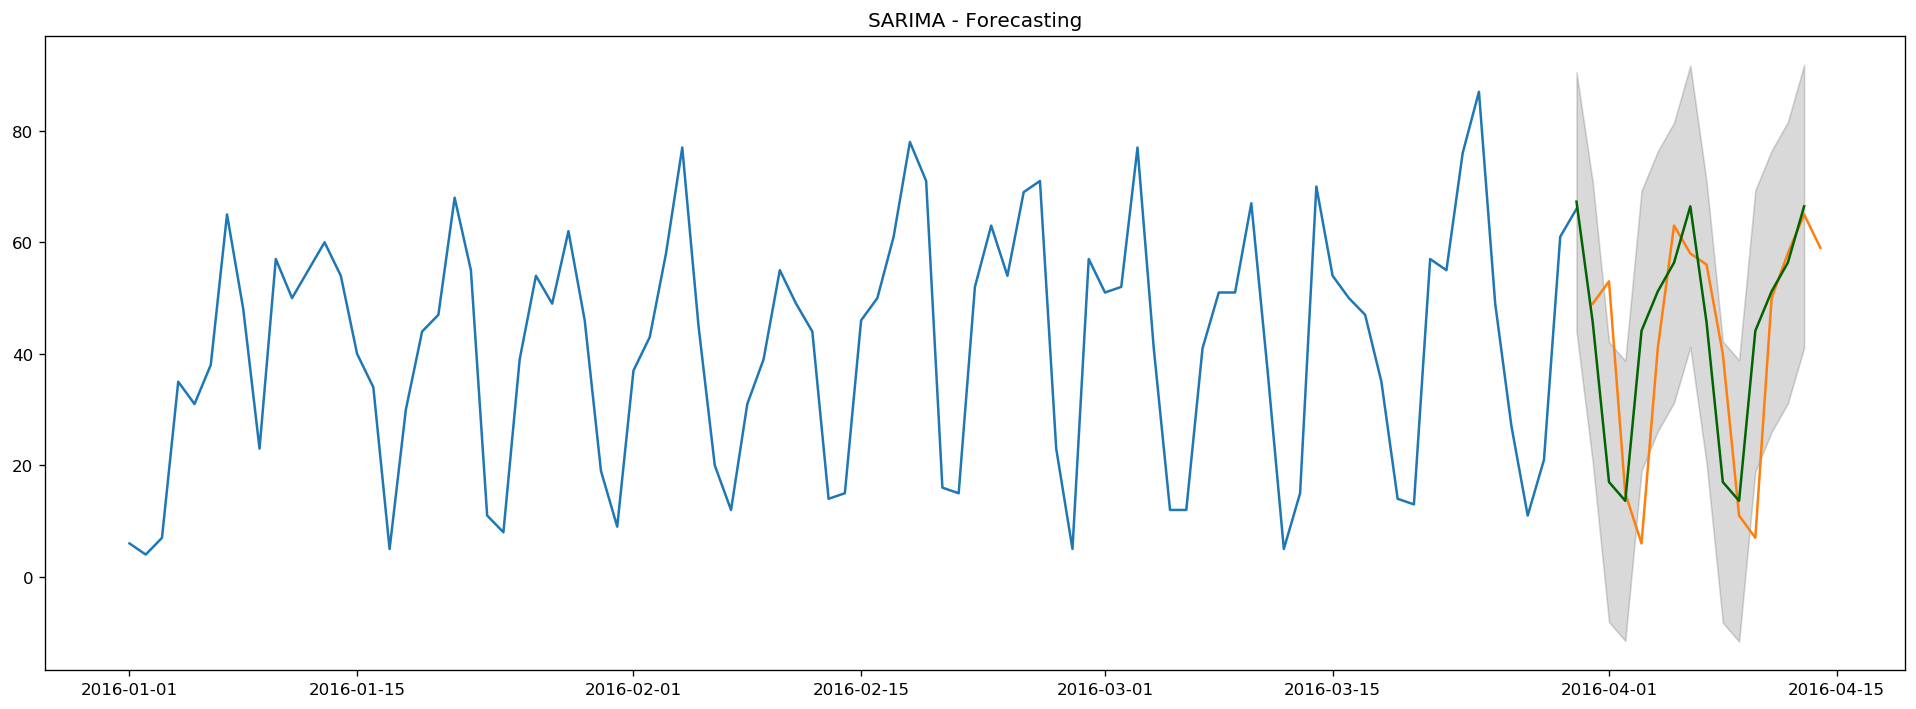

The RMSE values for Experiment 1.1 : 8.31
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.2 Input Length: 90 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


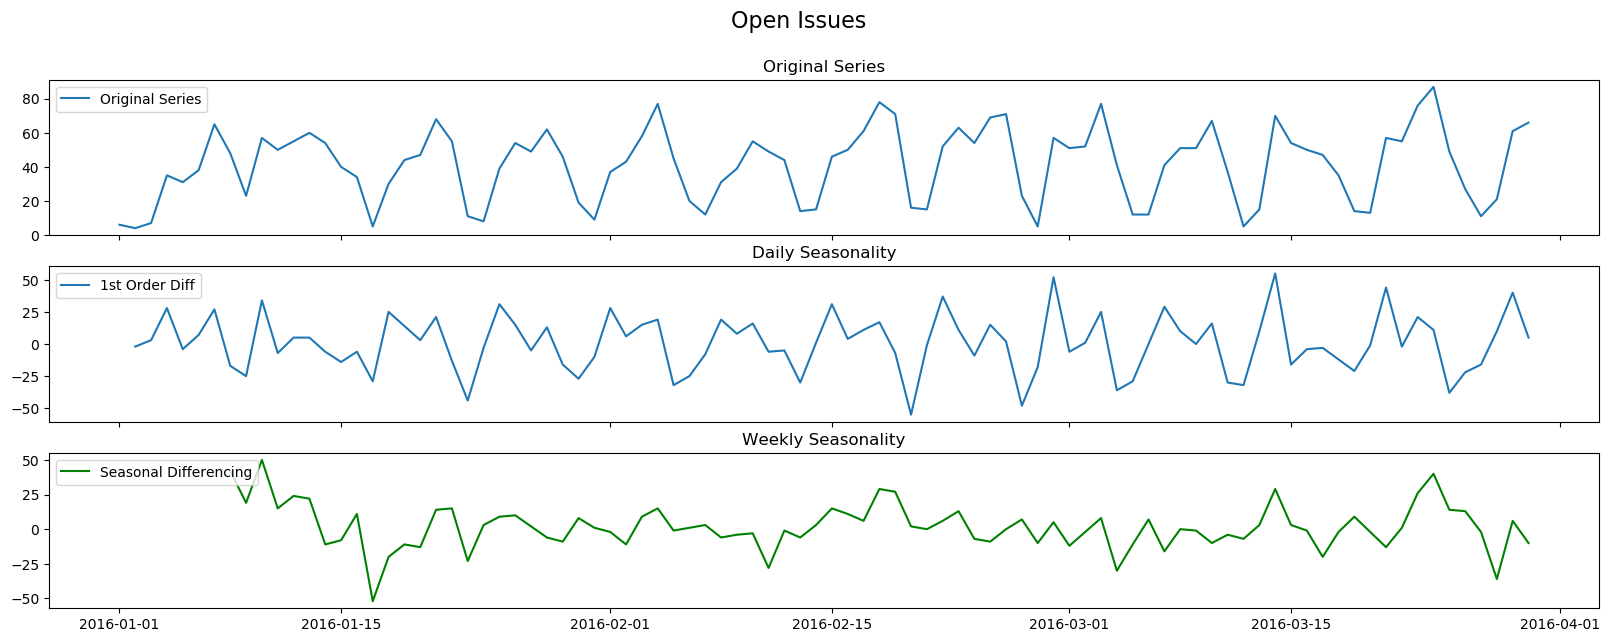

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=701.965, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=677.065, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=700.808, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=695.359, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=673.449, Time=0.17 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=680.581, Time=0.13 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=675.396, Time=0.23 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=674.406, Time=0.26 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=672.618, Time=0.18 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=676.372, Time=0.08 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=0.39 sec
 A

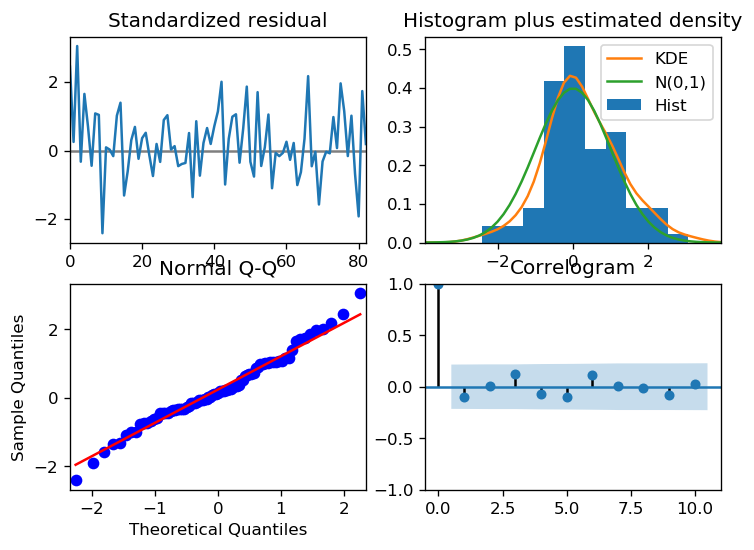

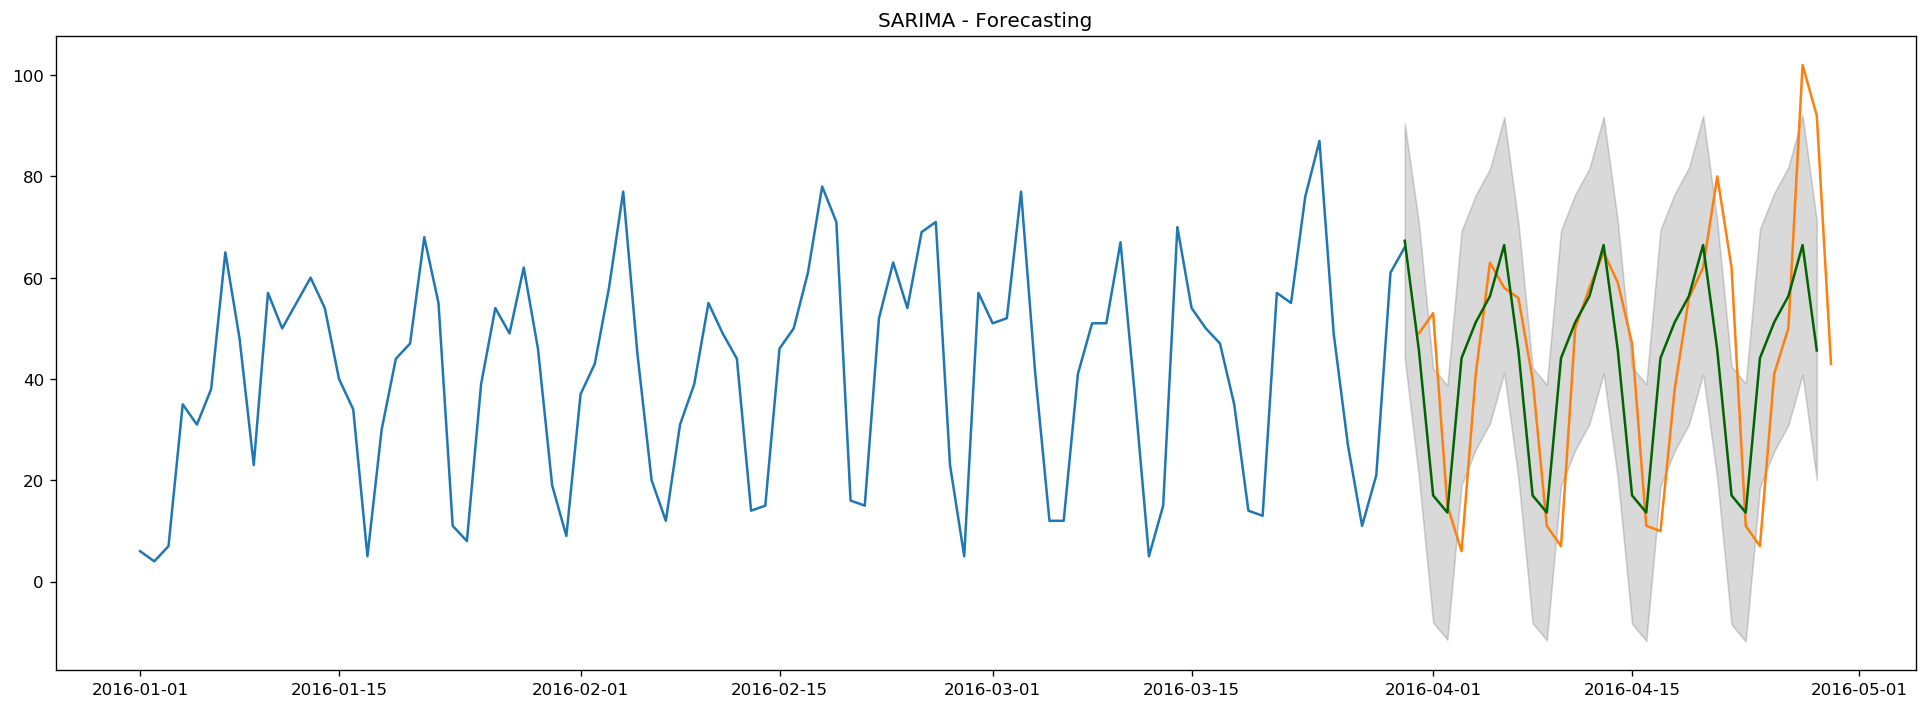

The RMSE values for Experiment 1.2 : 12.2
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.3 Input Length: 90 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


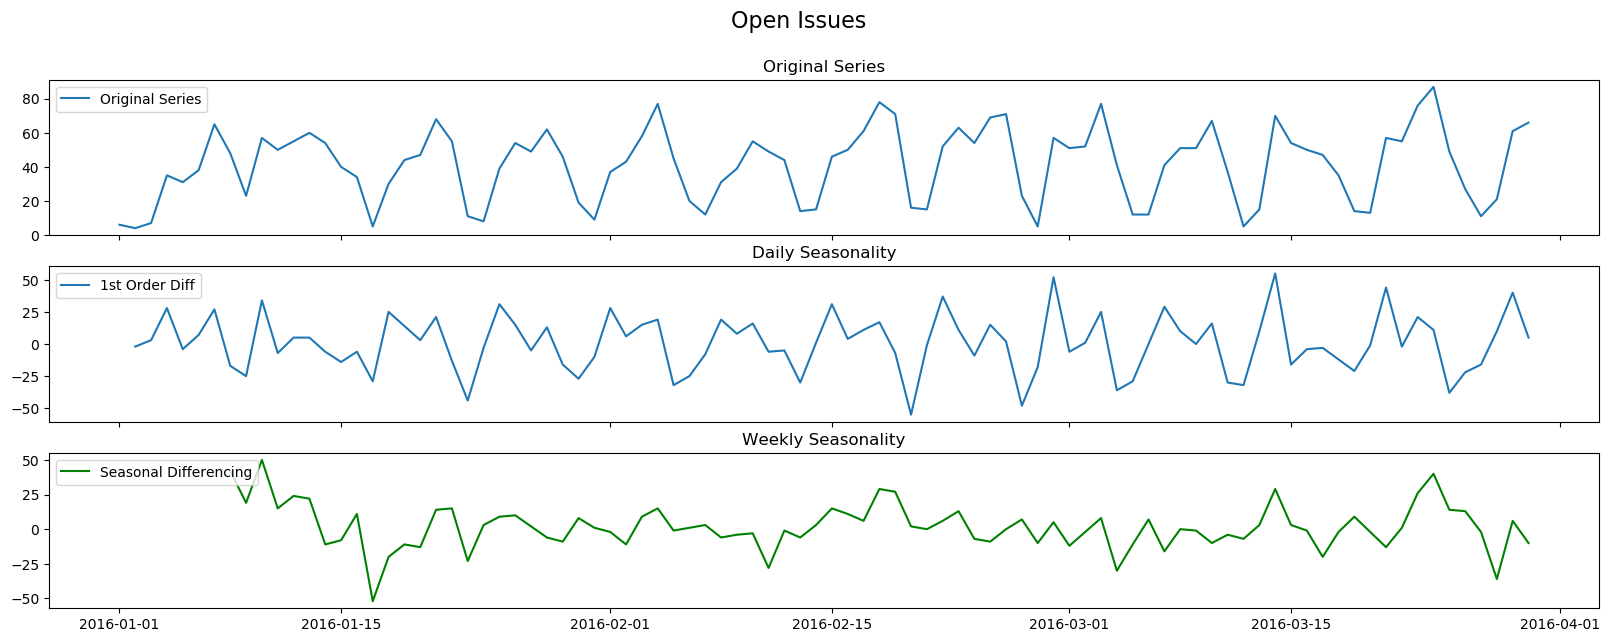

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=701.965, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=677.065, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=700.808, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=695.359, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=673.449, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=680.581, Time=0.12 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=675.396, Time=0.23 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=674.406, Time=0.27 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=672.618, Time=0.18 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=676.372, Time=0.08 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=0.38 sec
 A

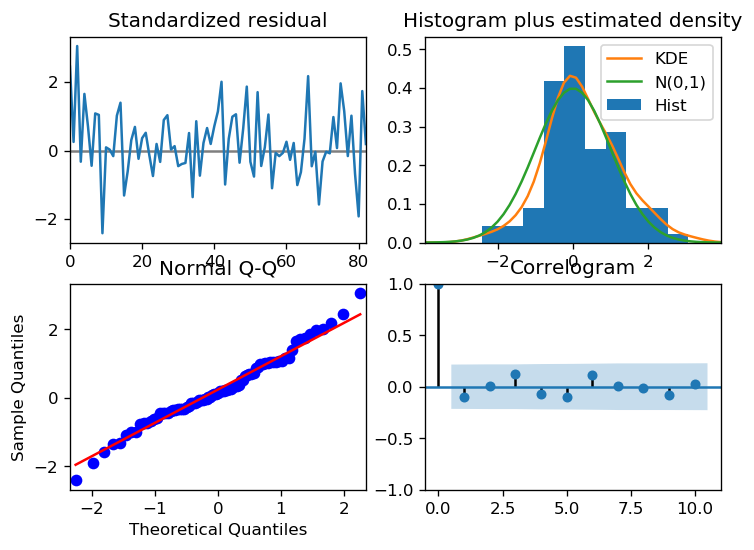

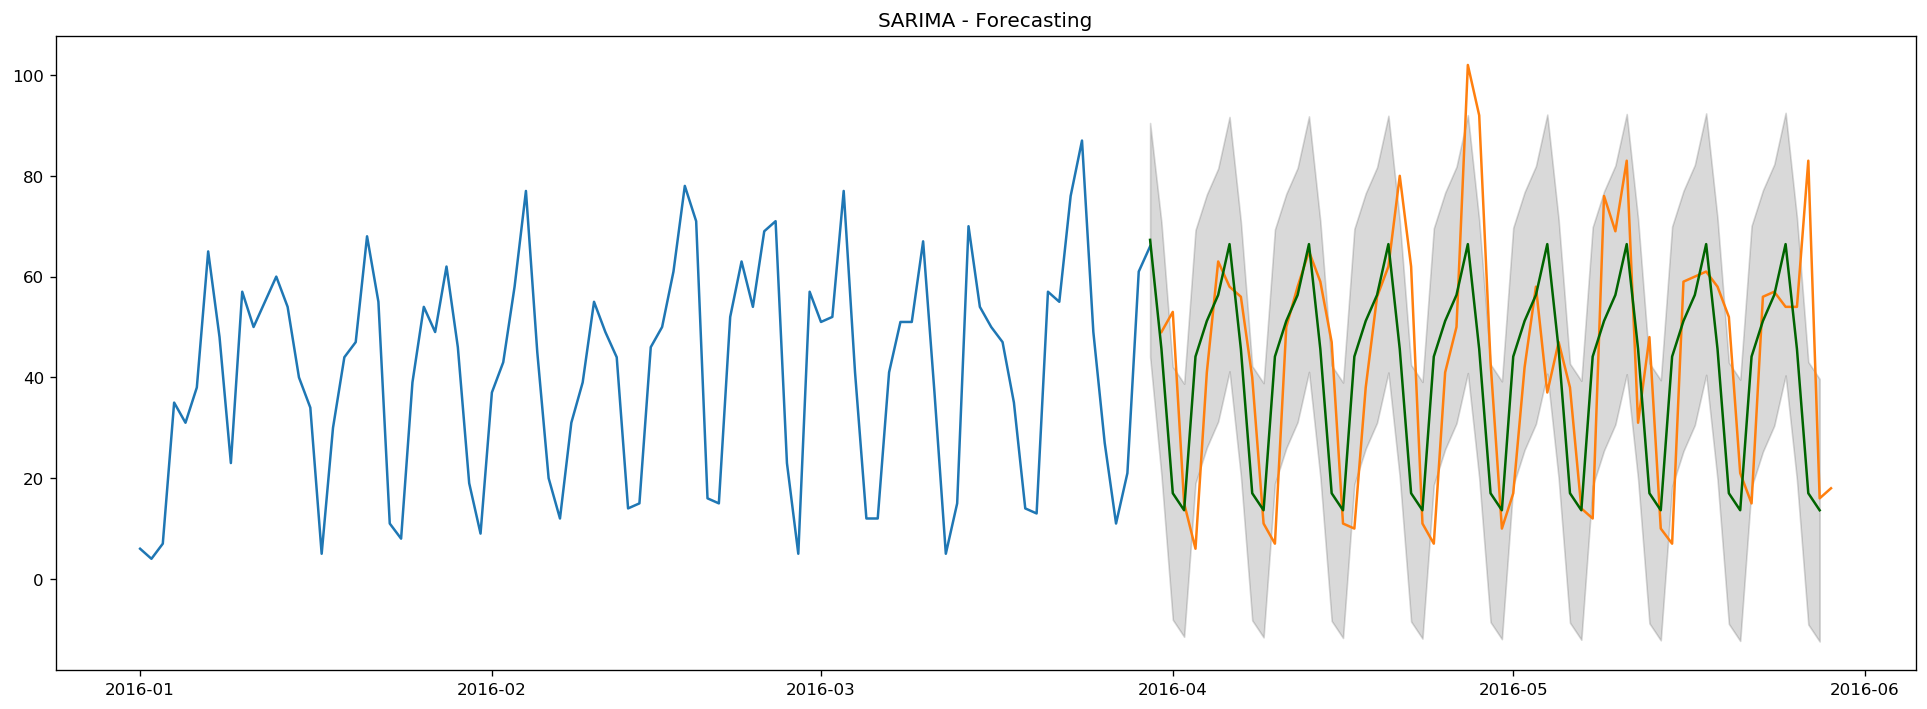

The RMSE values for Experiment 1.3 : 13.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.4 Input Length: 90 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


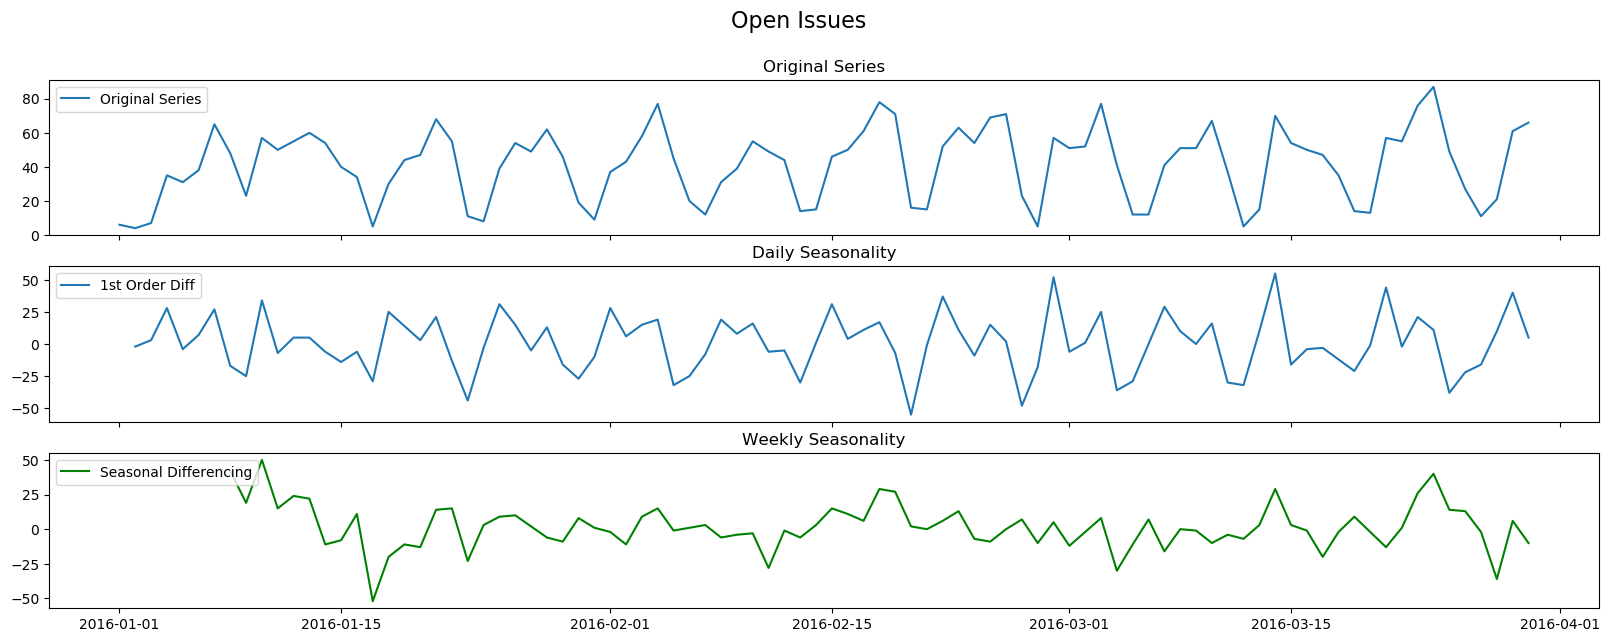

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=701.965, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=677.065, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=700.808, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=695.359, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=673.449, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=680.581, Time=0.12 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=675.396, Time=0.21 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=674.406, Time=0.28 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=672.618, Time=0.18 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=676.372, Time=0.08 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=0.68 sec
 A

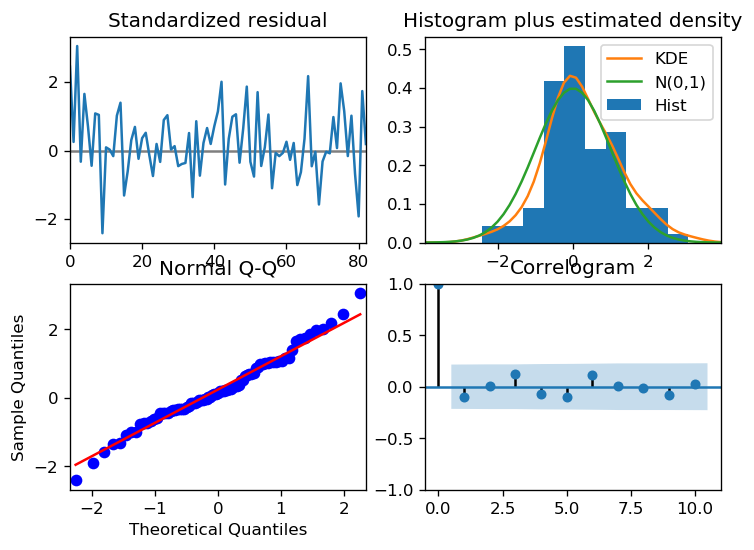

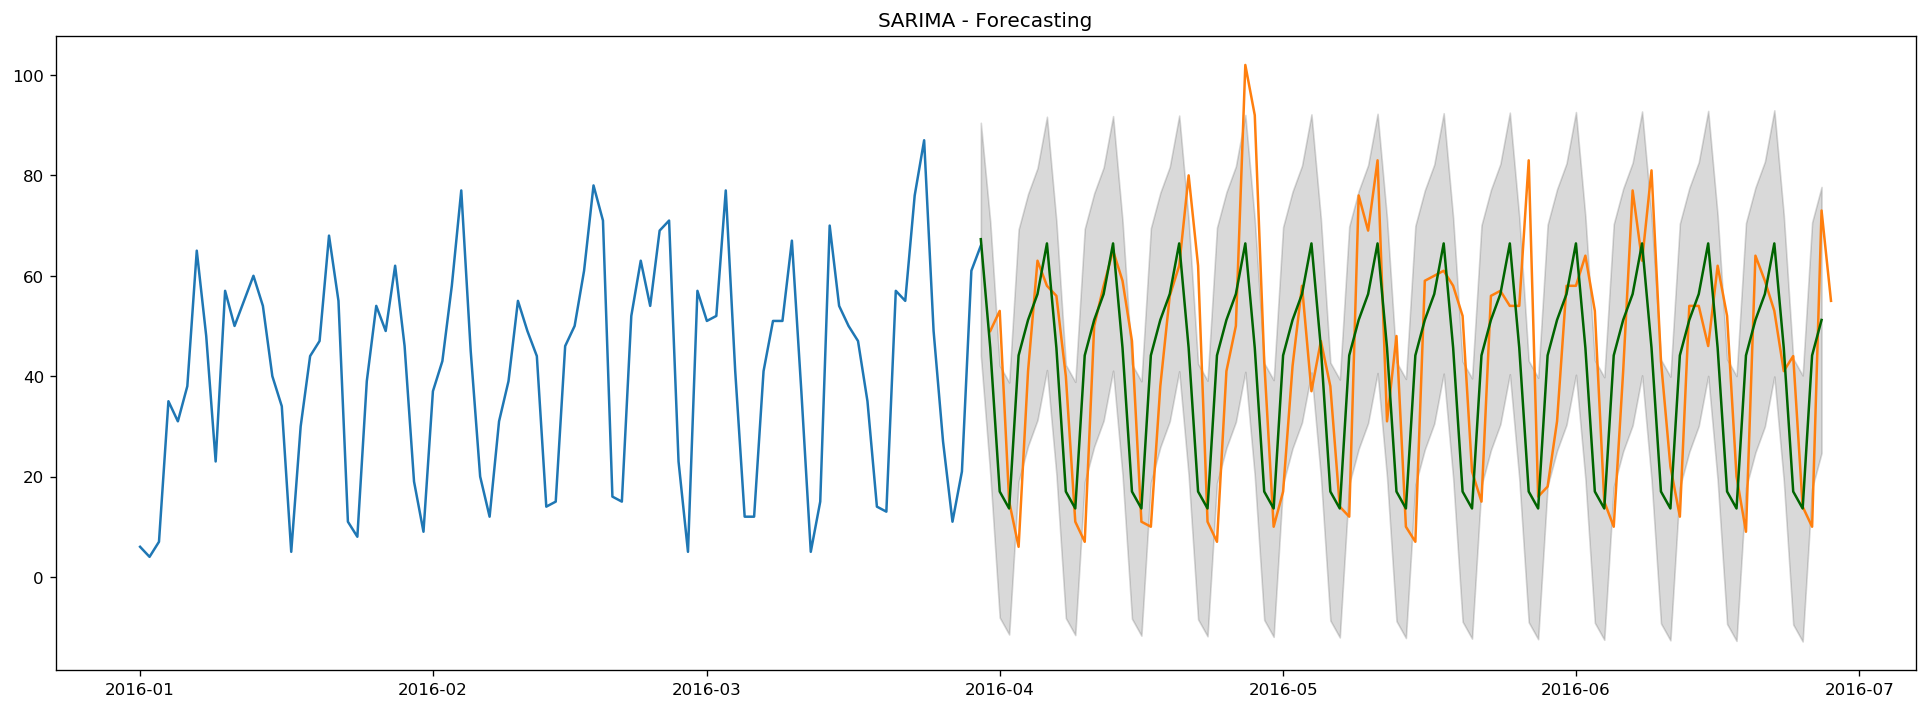

The RMSE values for Experiment 1.4 : 12.72
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.5 Input Length: 360 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


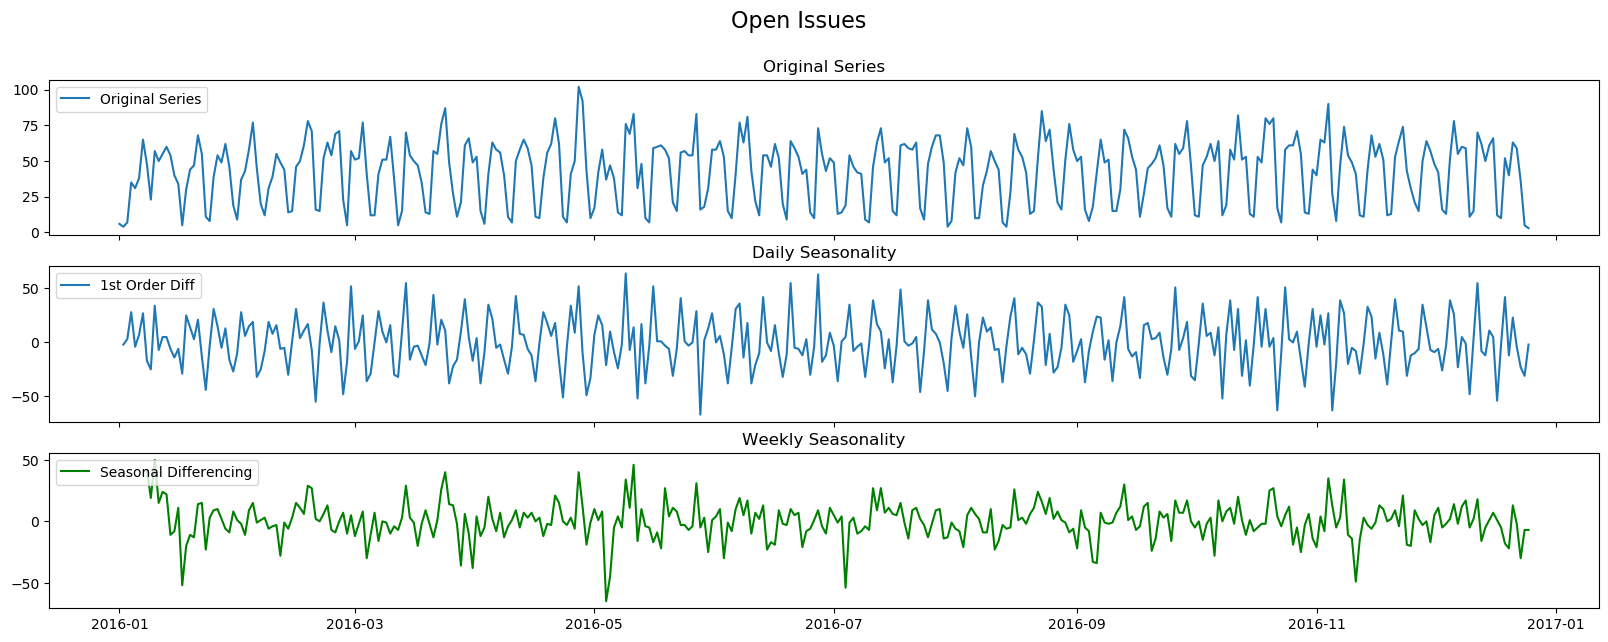

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2915.998, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2831.019, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2914.064, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2904.702, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2807.302, Time=0.45 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2818.238, Time=0.55 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2809.285, Time=0.64 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=2809.287, Time=0.67 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=2807.965, Time=0.42 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=2811.302, Time=0.65 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=2805.393, T

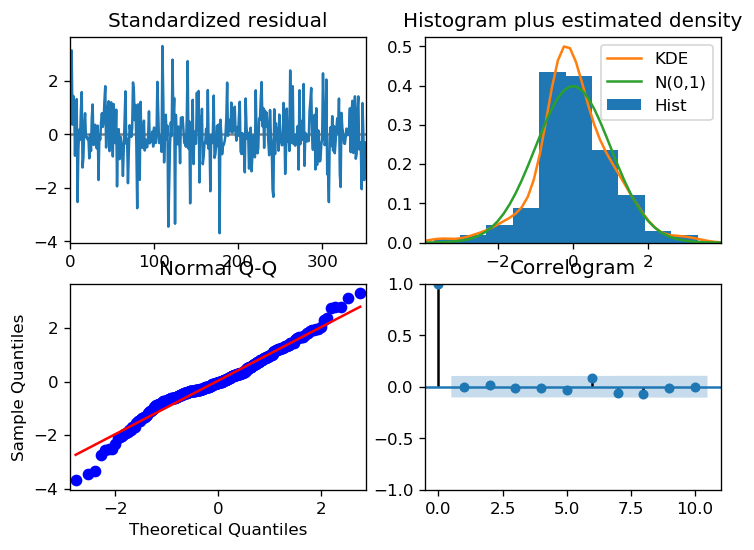

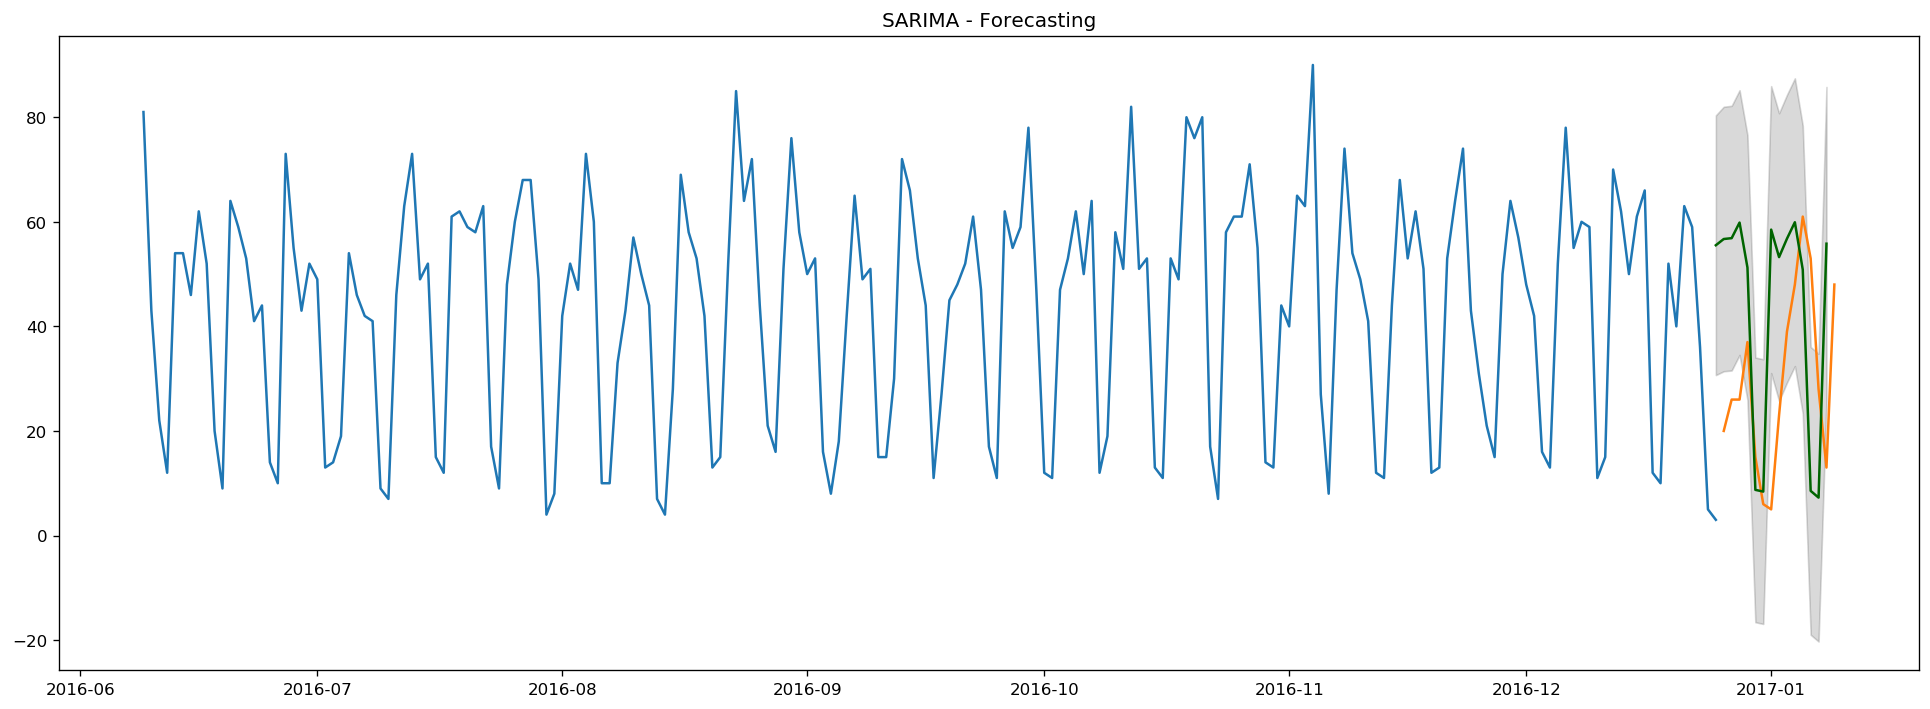

The RMSE values for Experiment 1.5 : 21.65
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.6 Input Length: 360 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


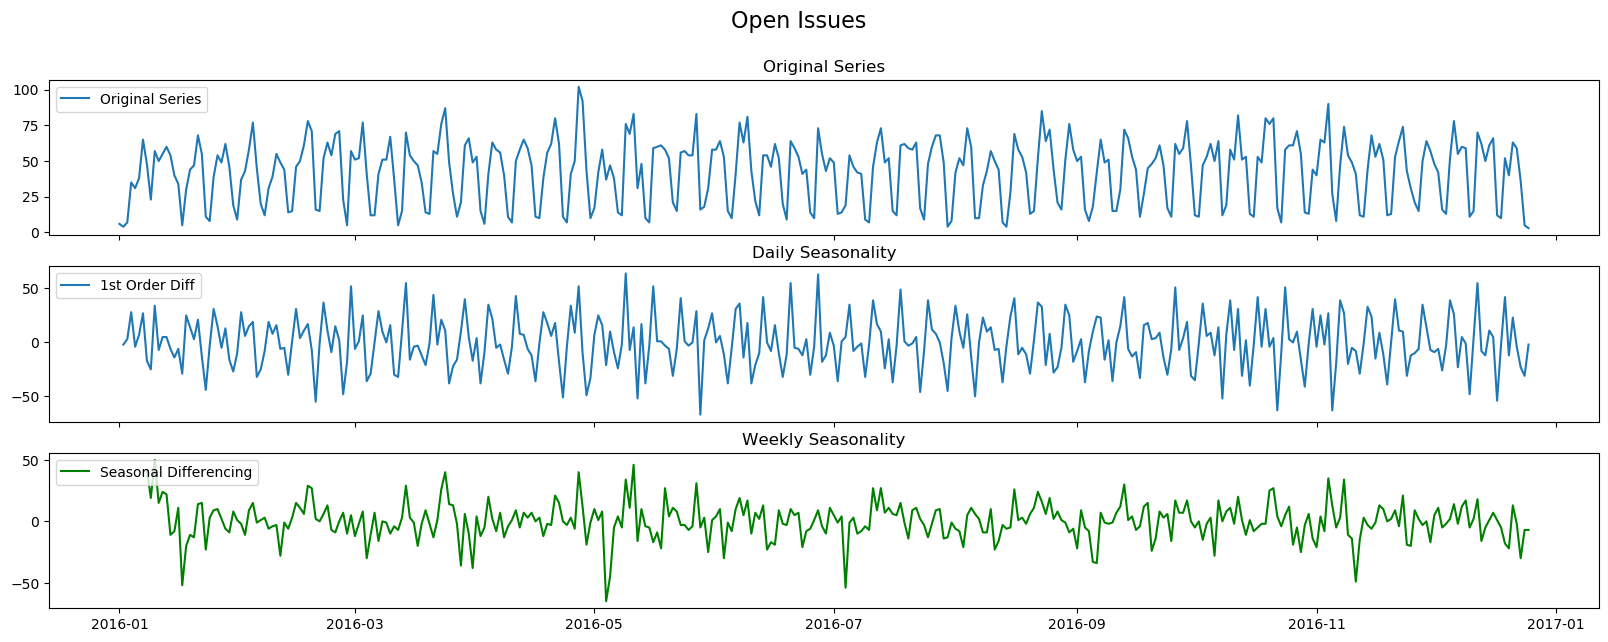

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2915.998, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2831.019, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2914.064, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2904.702, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2807.302, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2818.238, Time=0.51 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2809.285, Time=0.61 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=2809.287, Time=0.68 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=2807.965, Time=0.47 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=2811.302, Time=0.69 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=2805.393, T

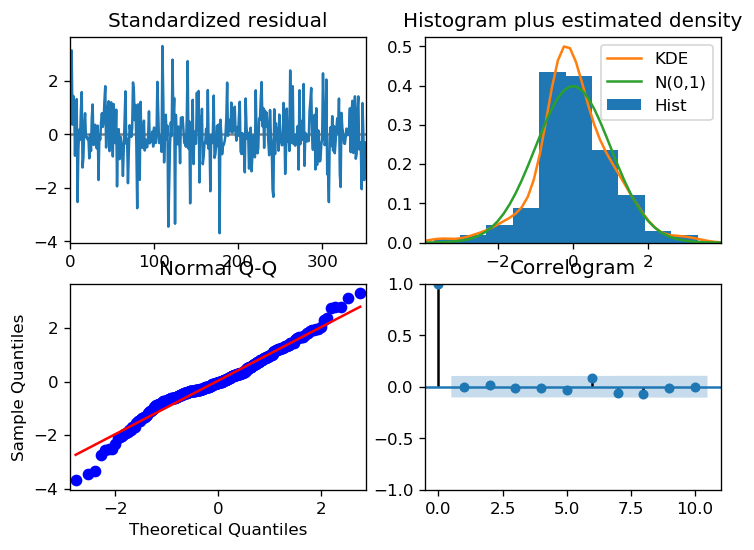

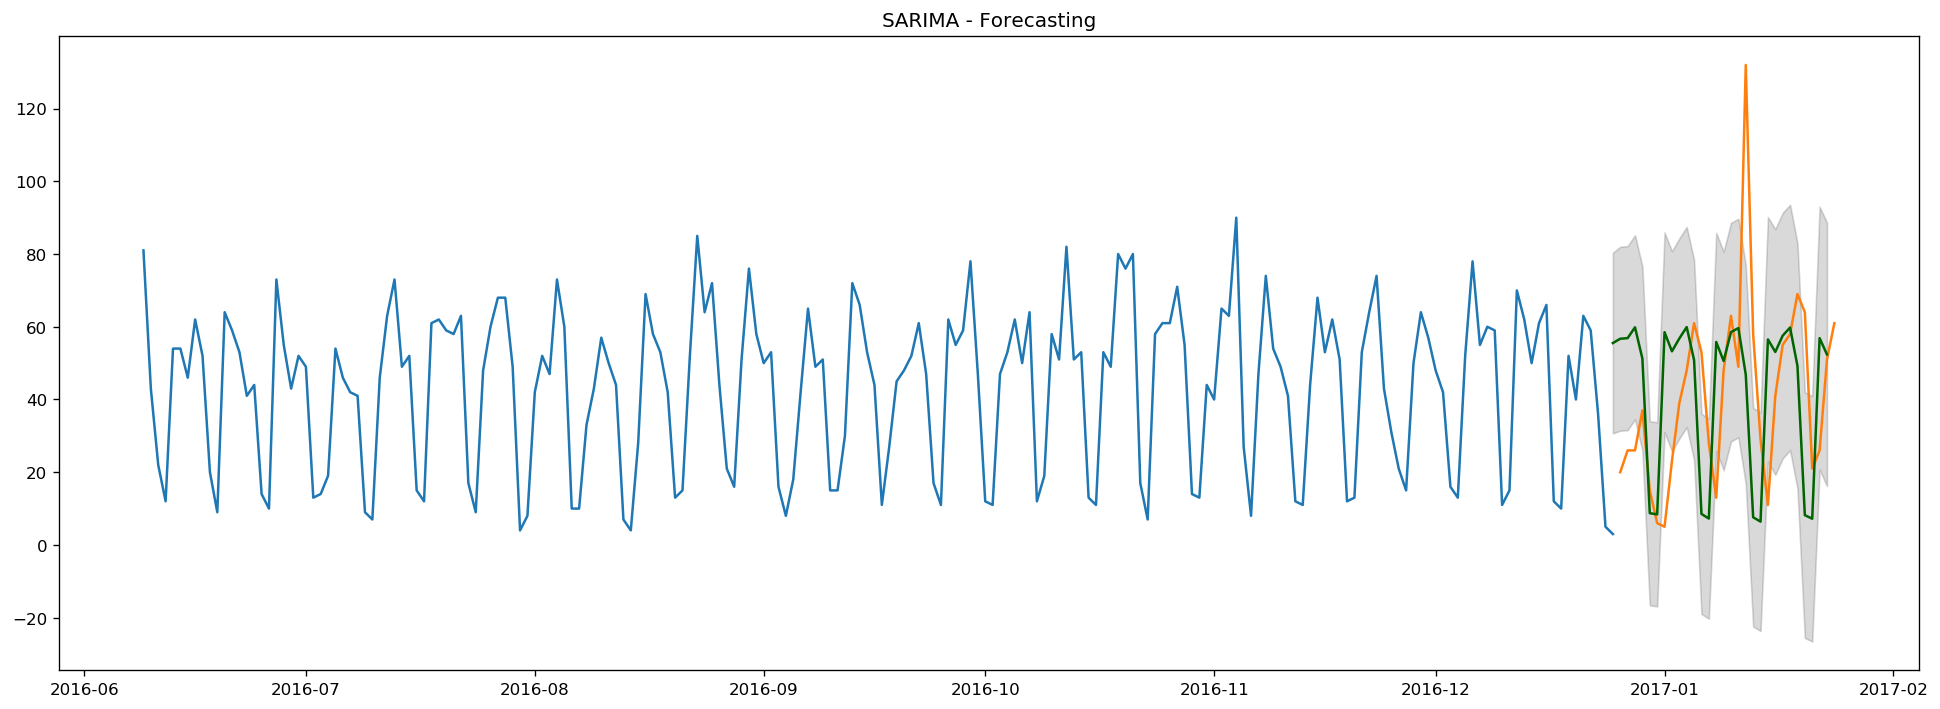

The RMSE values for Experiment 1.6 : 21.82
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.7 Input Length: 360 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


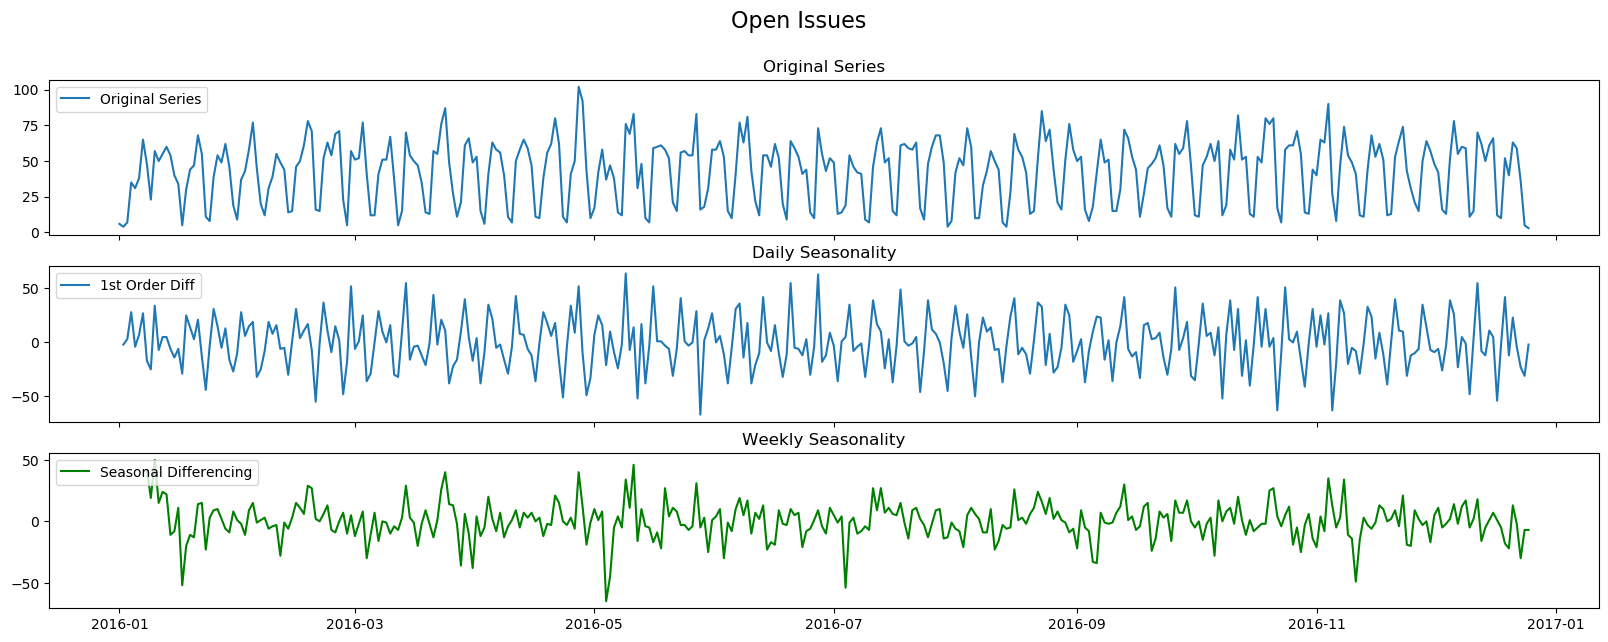

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2915.998, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2831.019, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2914.064, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2904.702, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2807.302, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2818.238, Time=0.59 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2809.285, Time=0.75 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=2809.287, Time=0.71 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=2807.965, Time=0.52 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=2811.302, Time=0.85 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=2805.393, T

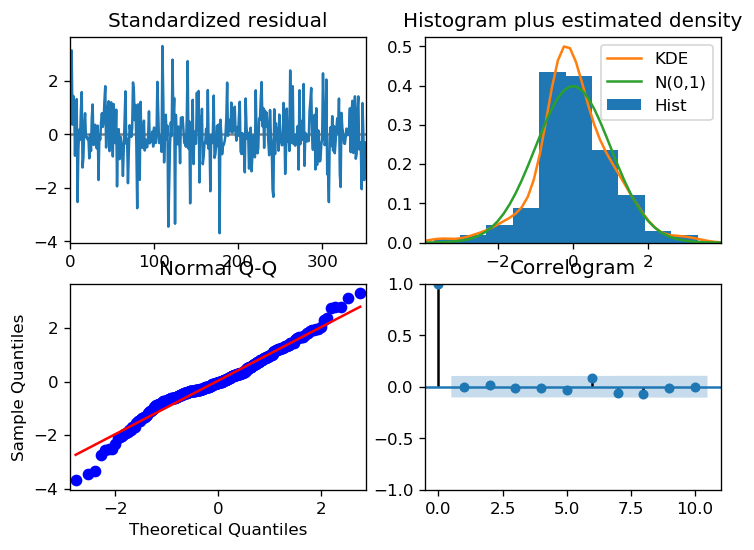

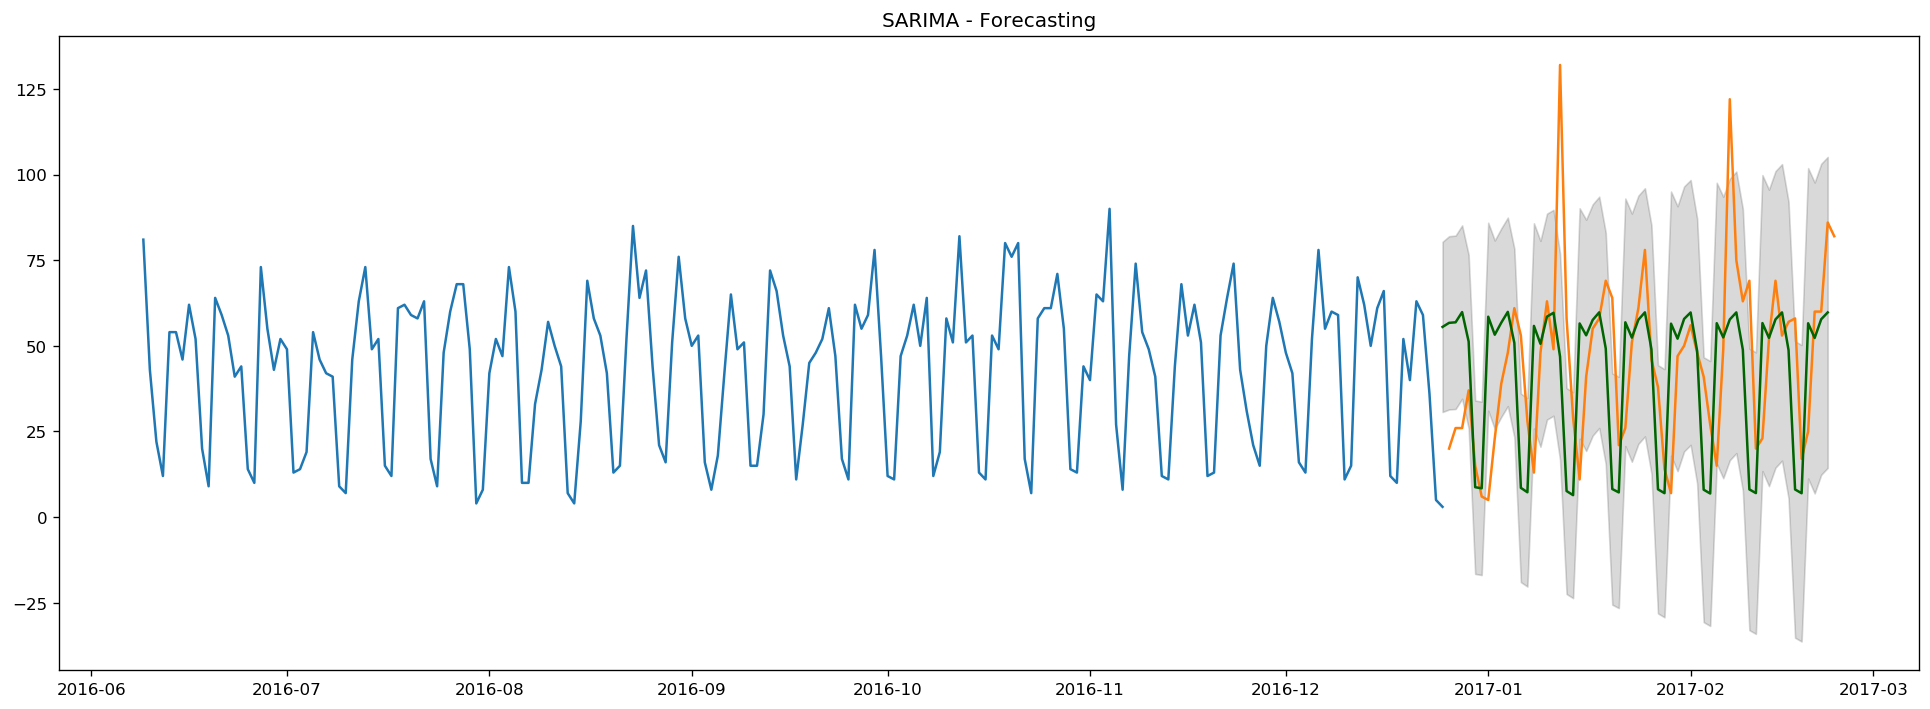

The RMSE values for Experiment 1.7 : 19.98
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.8 Input Length: 360 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


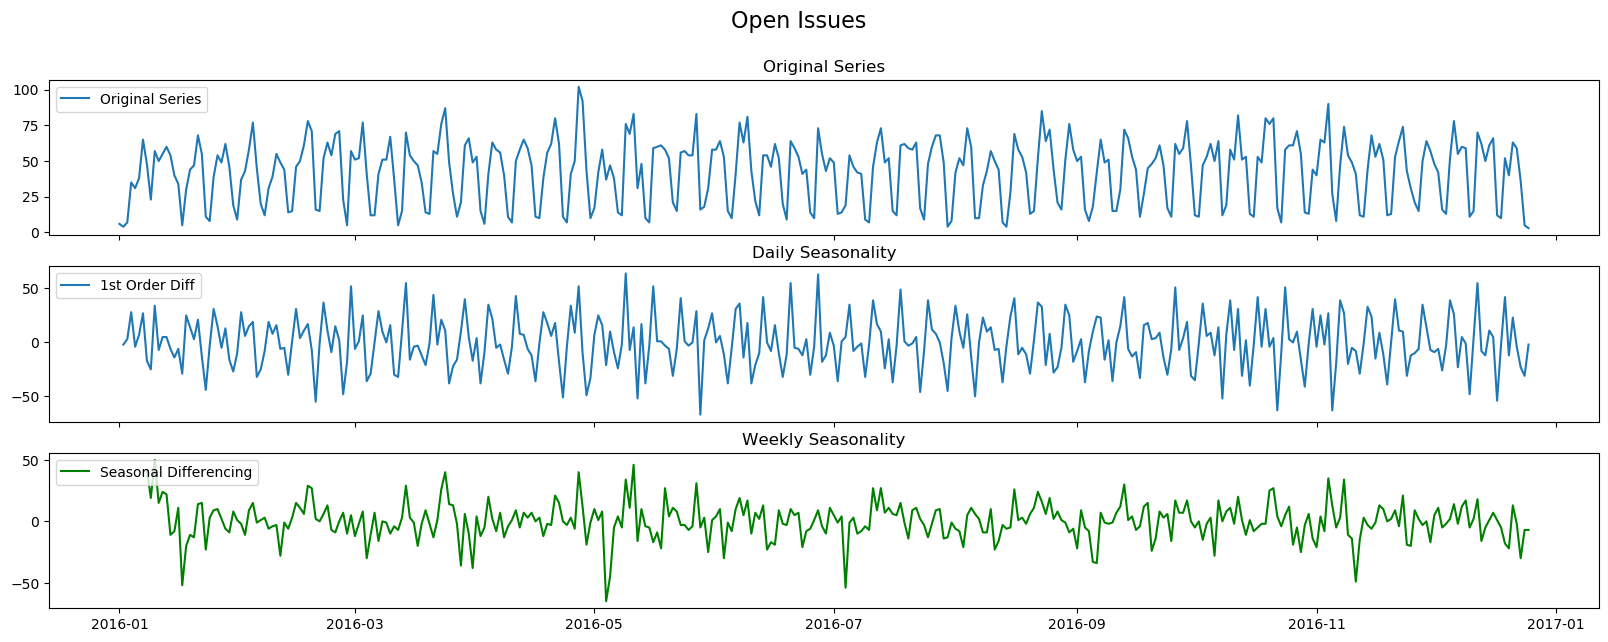

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2915.998, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2831.019, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2914.064, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2904.702, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2807.302, Time=0.52 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2818.238, Time=0.65 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2809.285, Time=0.74 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=2809.287, Time=0.80 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=2807.965, Time=0.57 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=2811.302, Time=0.81 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=2805.393, T

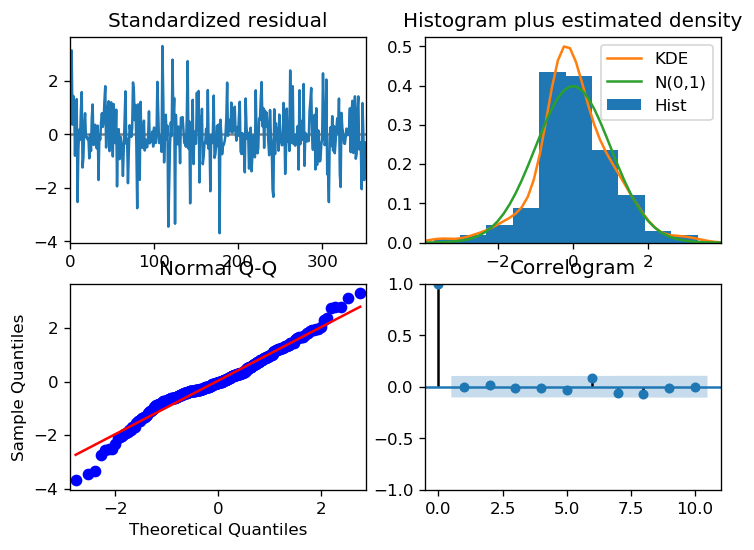

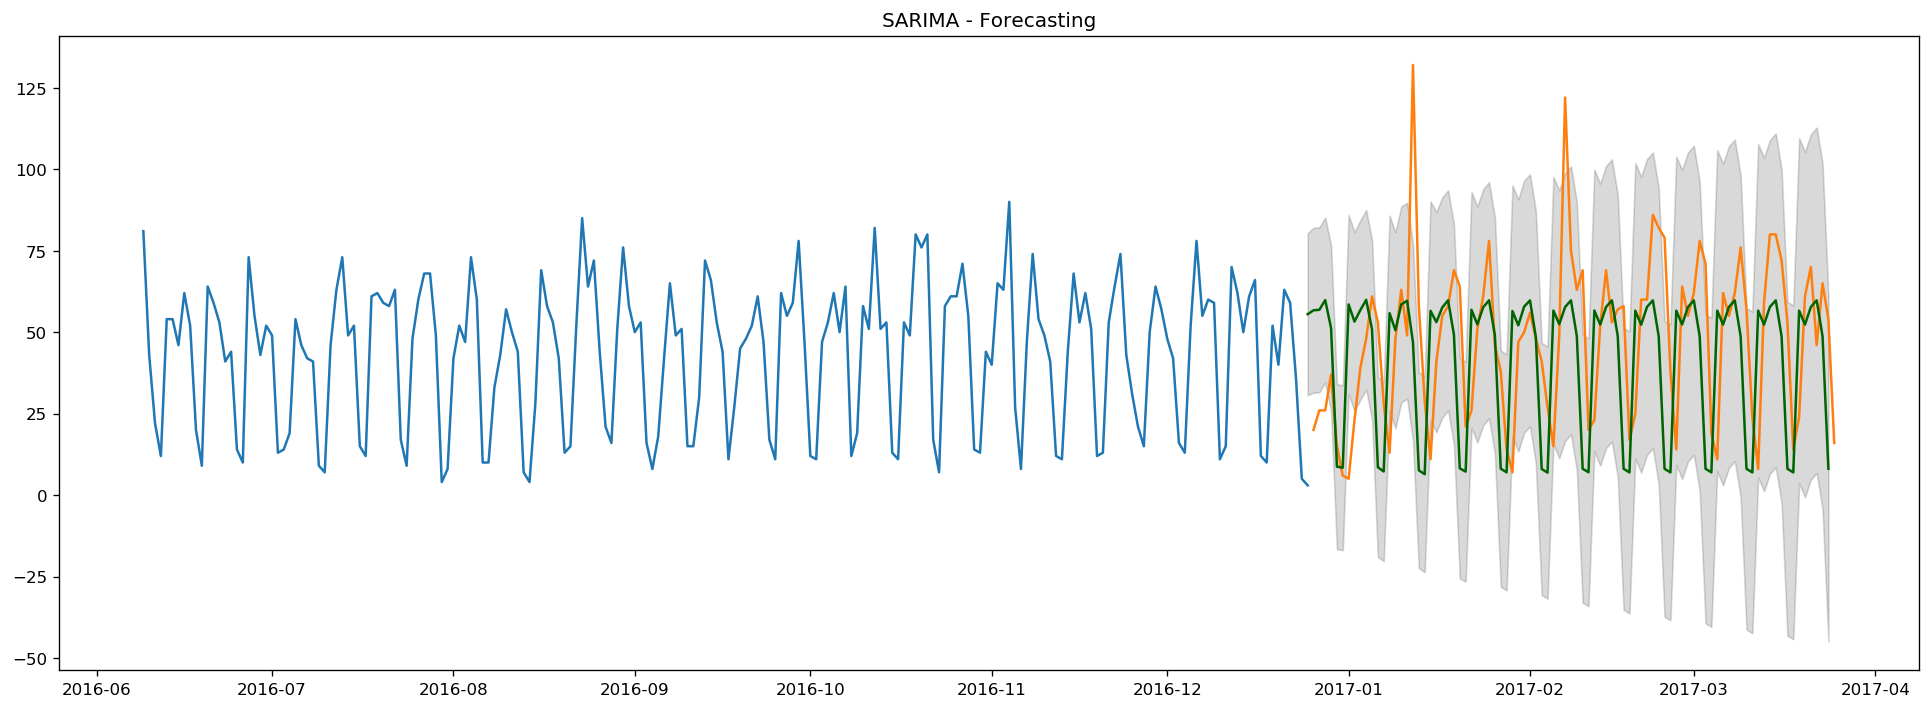

The RMSE values for Experiment 1.8 : 18.21
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.9 Input Length: 720 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


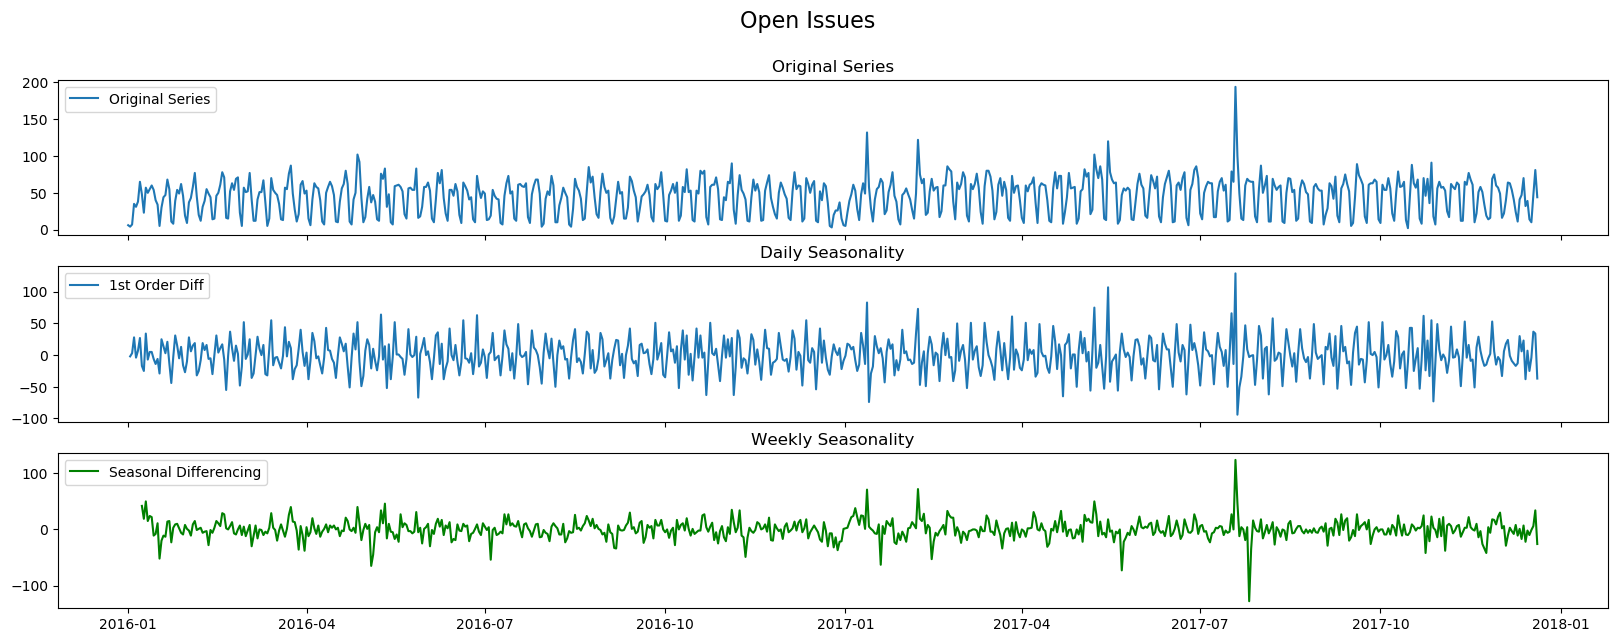

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6069.789, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5919.370, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6067.821, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6046.214, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5849.366, Time=0.92 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5875.132, Time=0.94 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5846.686, Time=1.29 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=5916.495, Time=0.55 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5846.605, Time=1.41 s

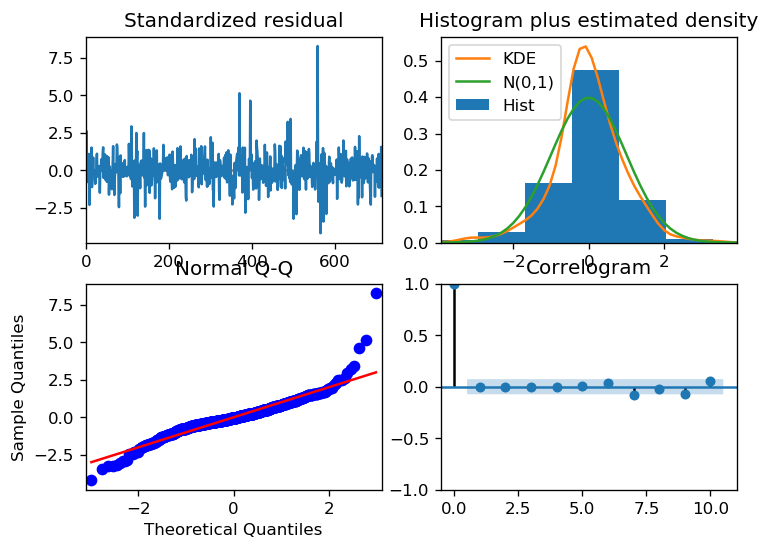

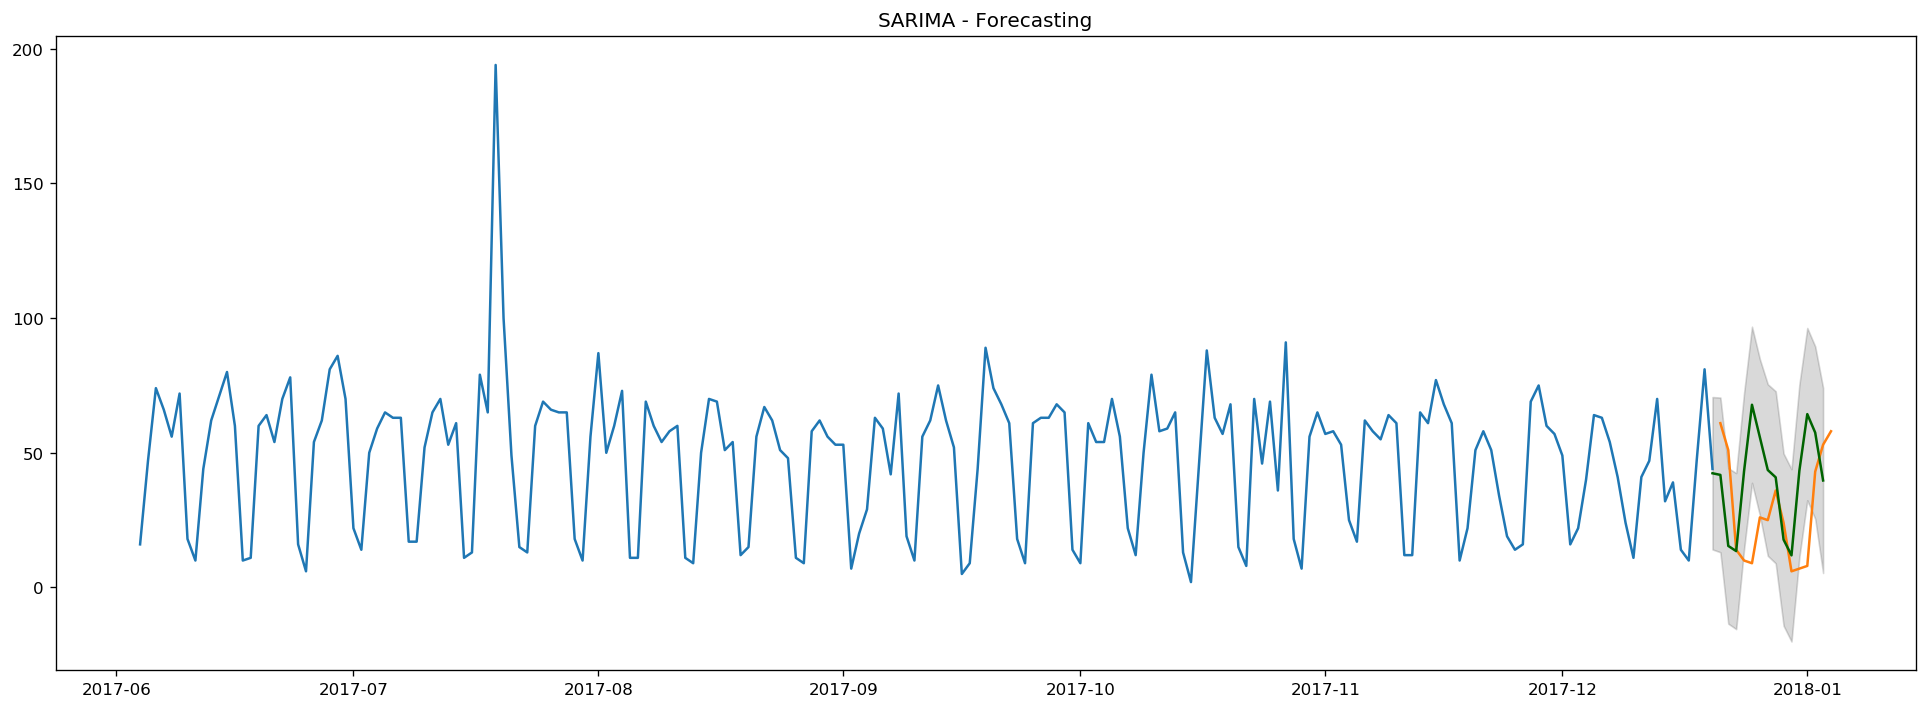

The RMSE values for Experiment 1.9 : 21.42
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.10 Input Length: 720 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


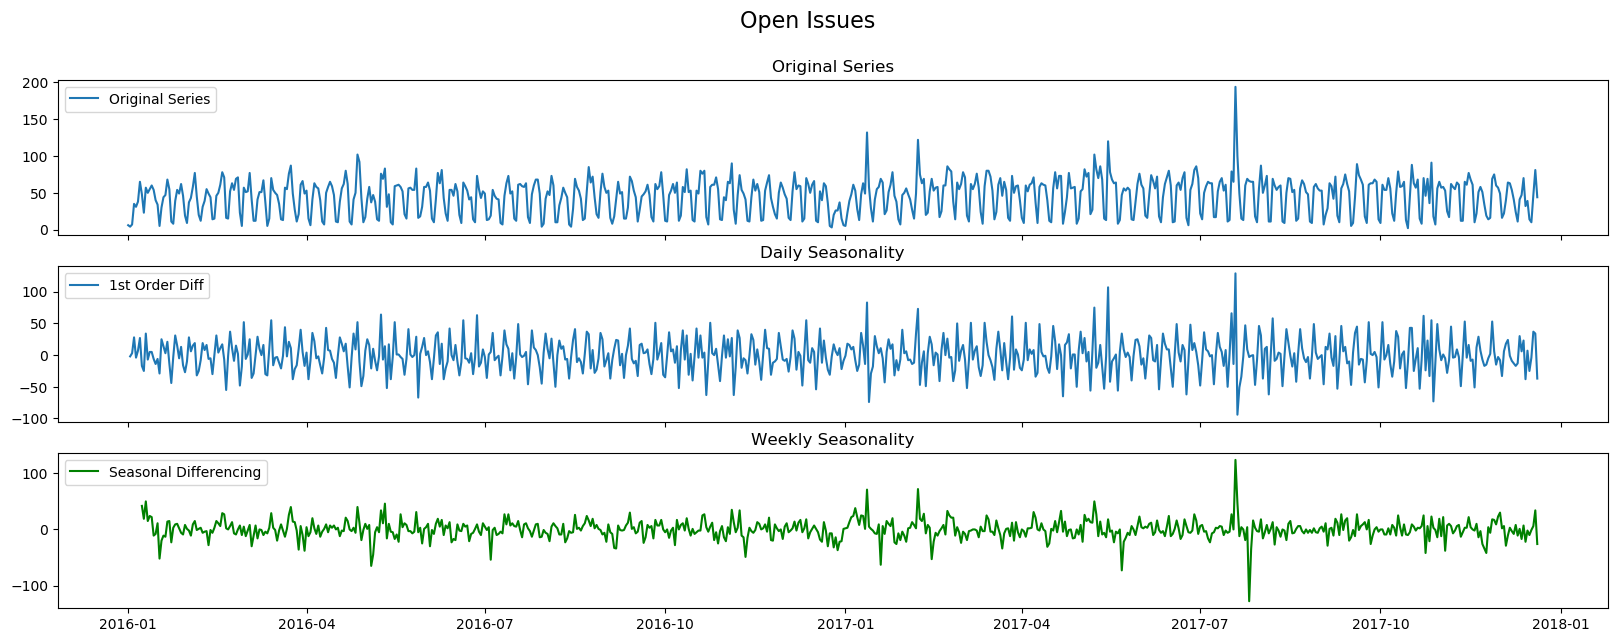

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6069.789, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5919.370, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6067.821, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6046.214, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5849.366, Time=0.92 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5875.132, Time=0.85 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5846.686, Time=1.28 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=5916.495, Time=0.54 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5846.605, Time=1.53 s

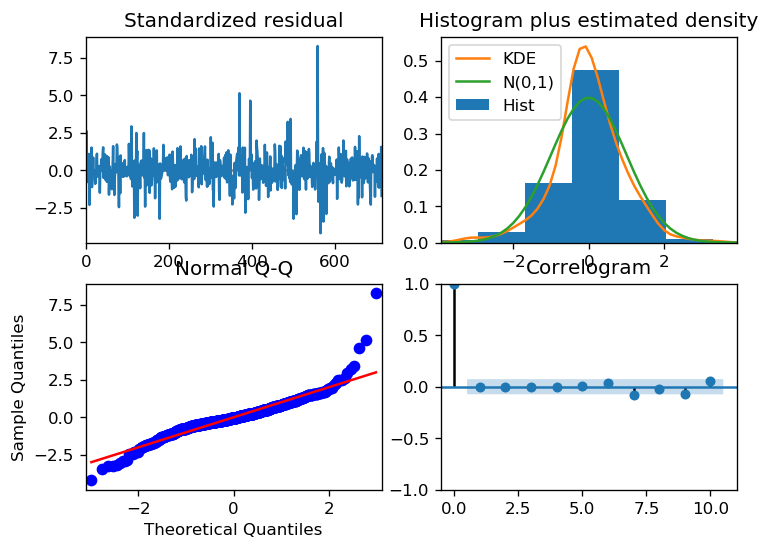

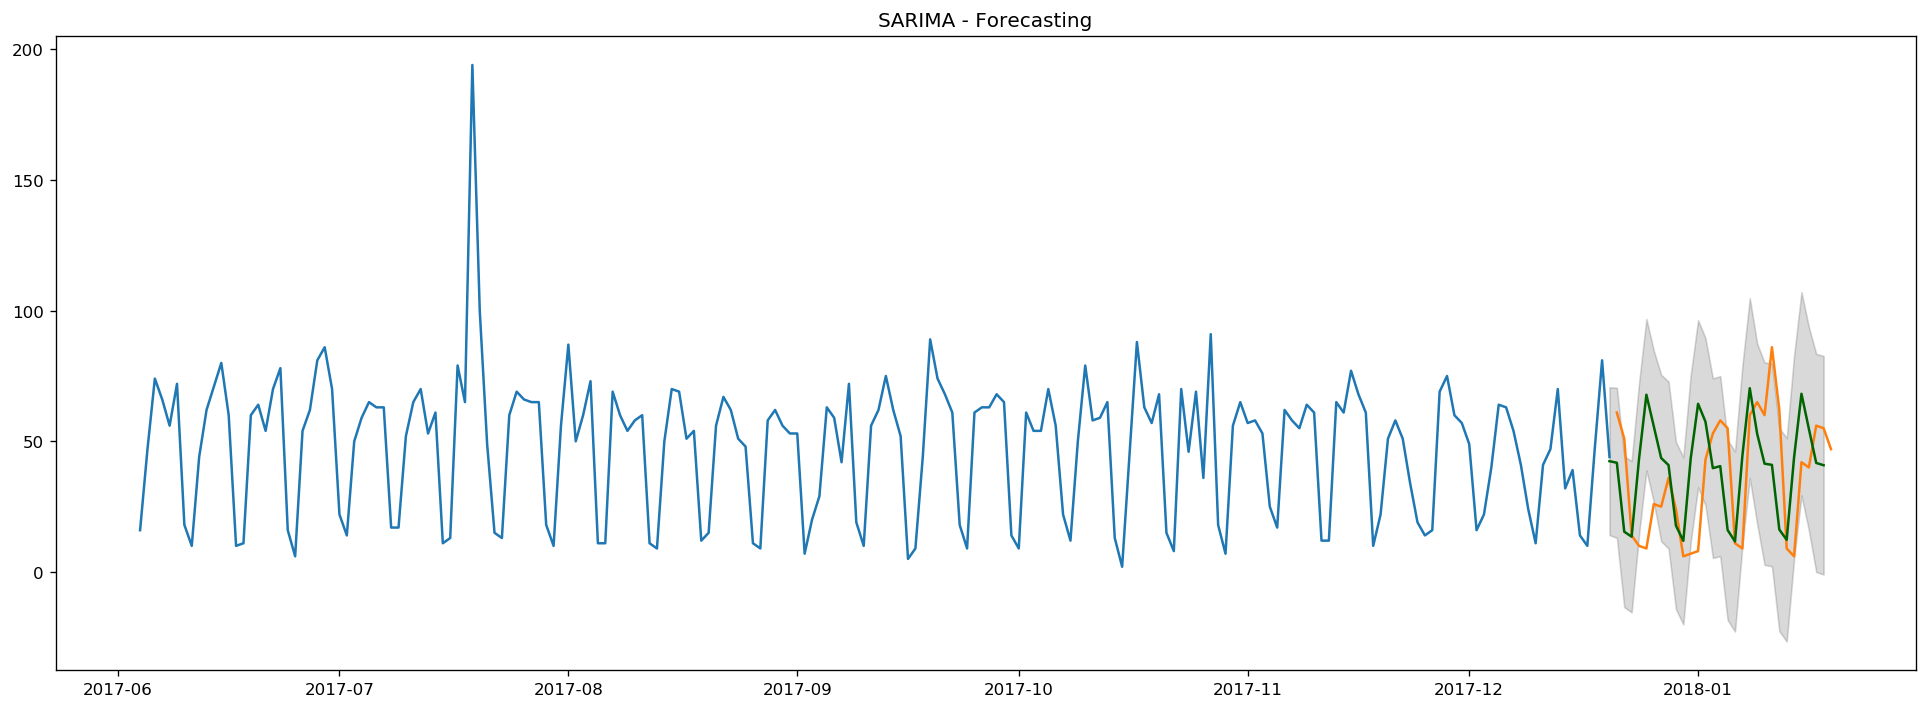

The RMSE values for Experiment 1.10 : 19.13
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.11 Input Length: 720 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


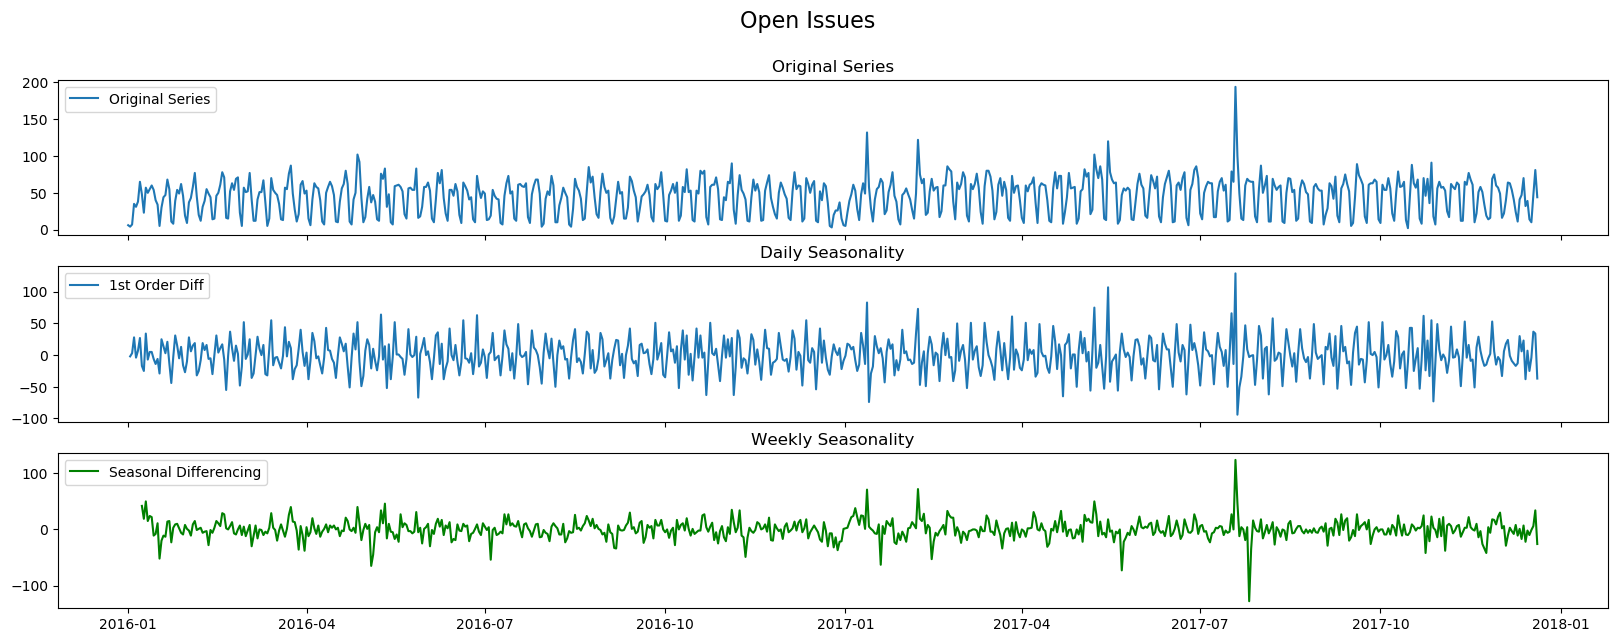

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6069.789, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5919.370, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6067.821, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6046.214, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5849.366, Time=0.92 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5875.132, Time=0.90 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5846.686, Time=1.27 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=5916.495, Time=0.54 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5846.605, Time=1.39 s

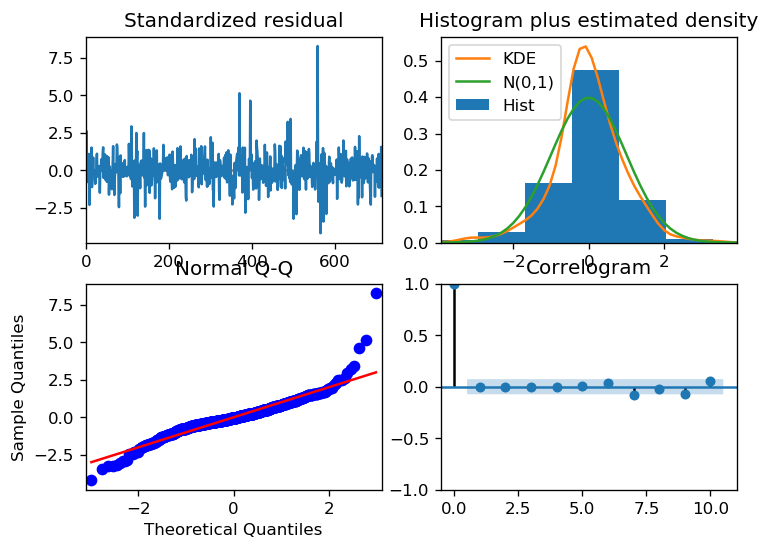

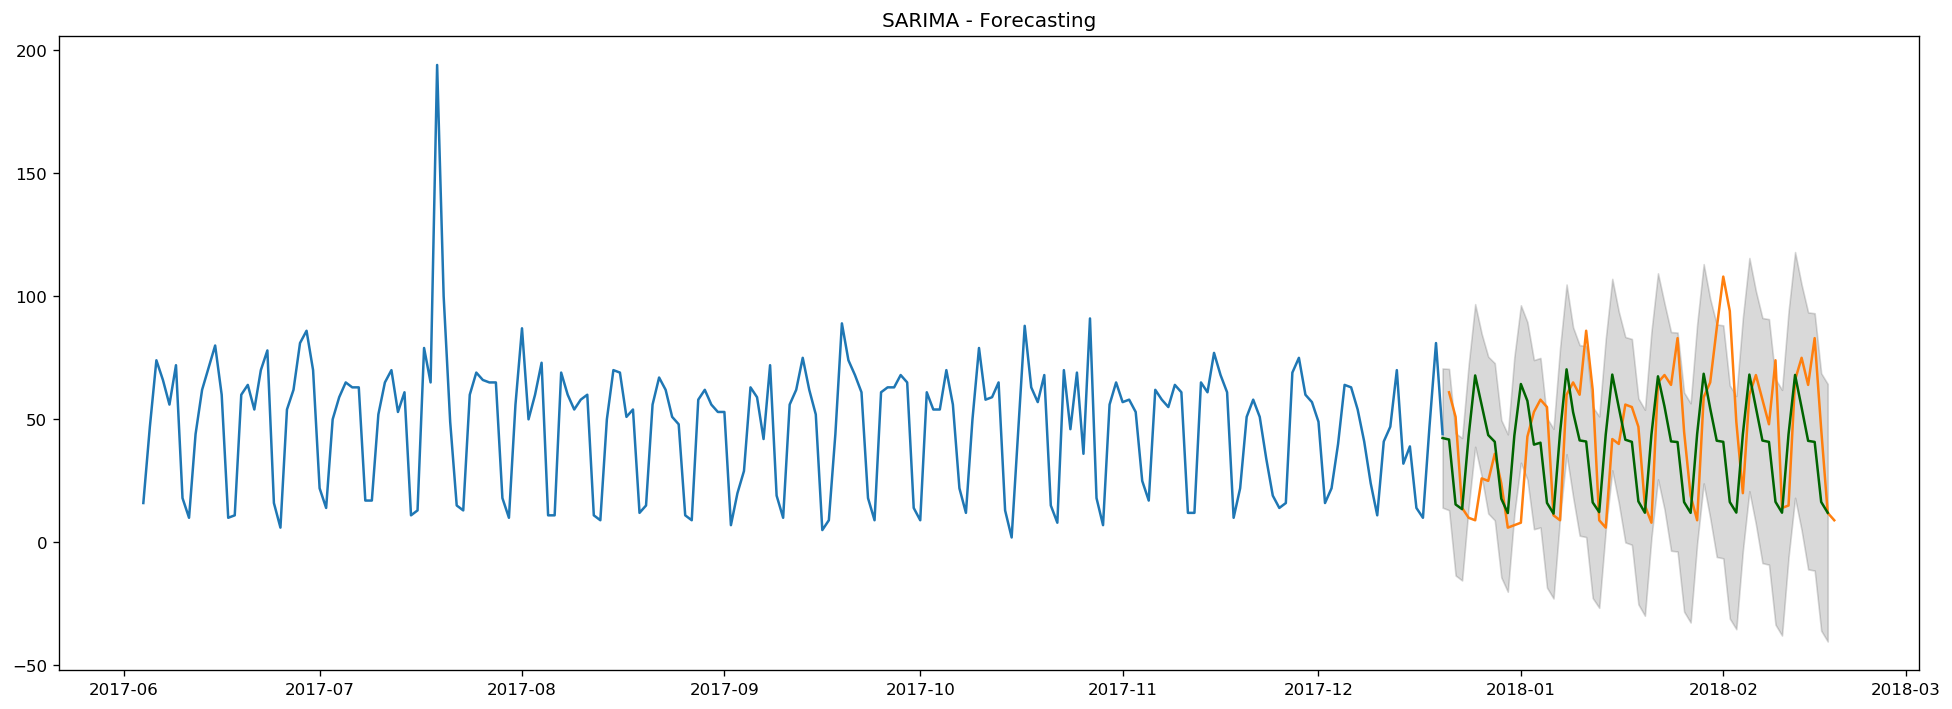

The RMSE values for Experiment 1.11 : 21.15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.12 Input Length: 720 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


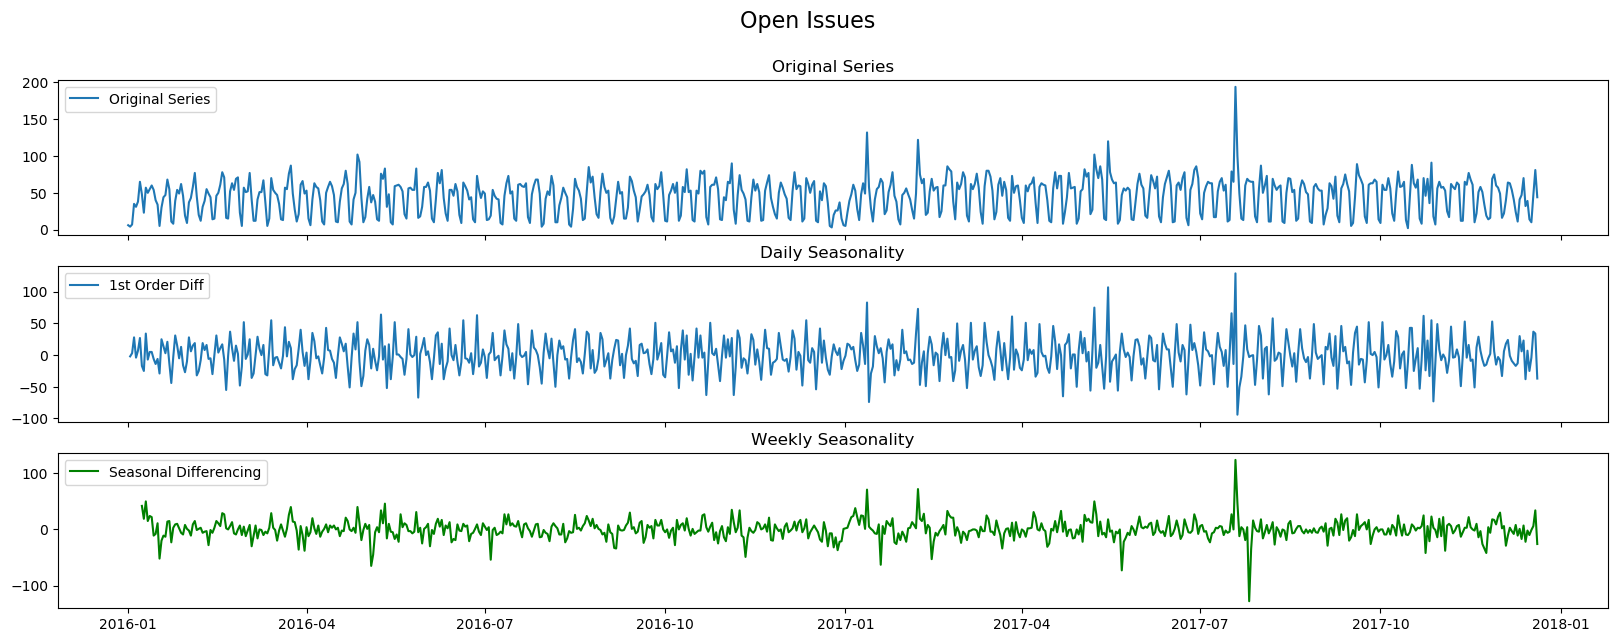

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6069.789, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5919.370, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6067.821, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6046.214, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5849.366, Time=0.88 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5875.132, Time=0.82 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5846.686, Time=1.17 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=5916.495, Time=0.50 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5846.605, Time=1.36 s

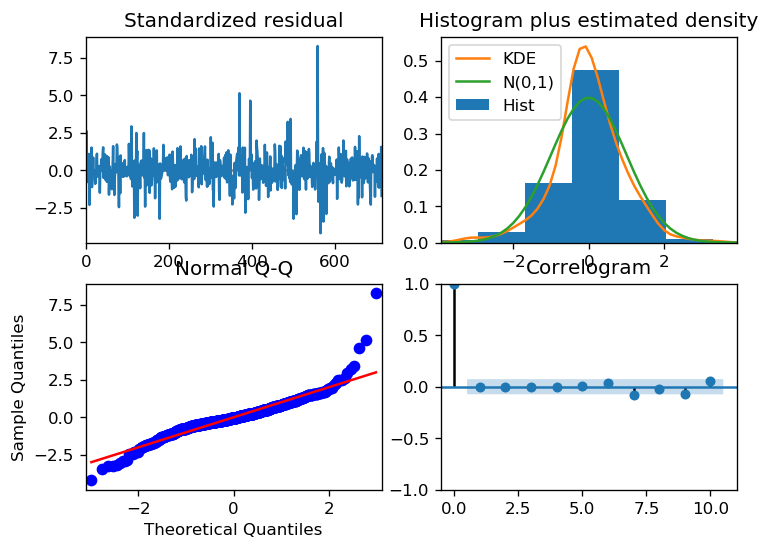

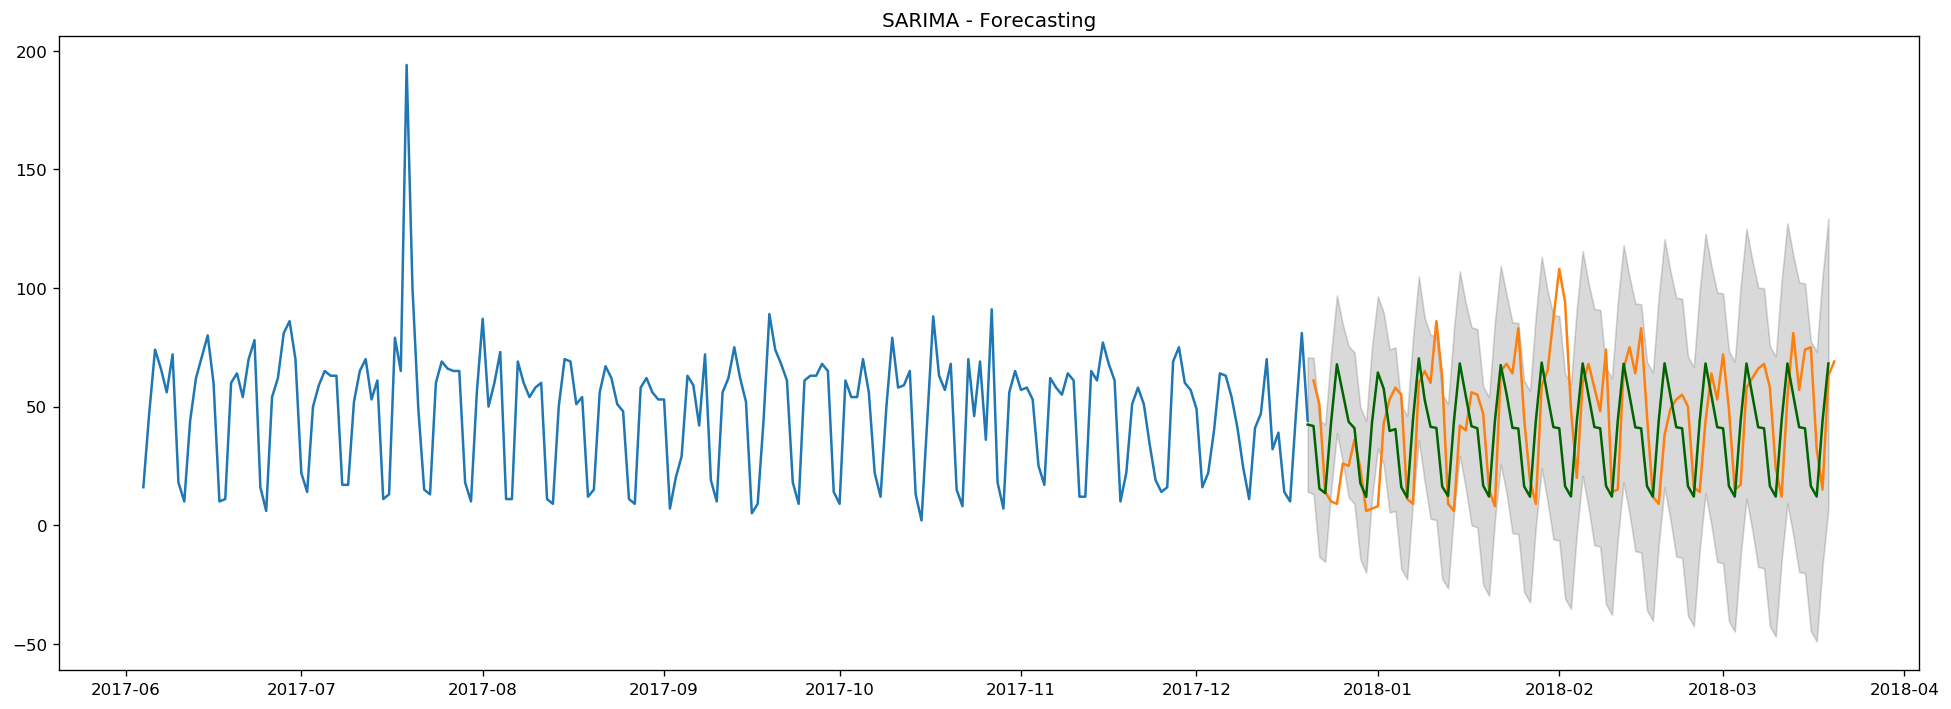

The RMSE values for Experiment 1.12 : 19.19
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.13 Input Length: 1440 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


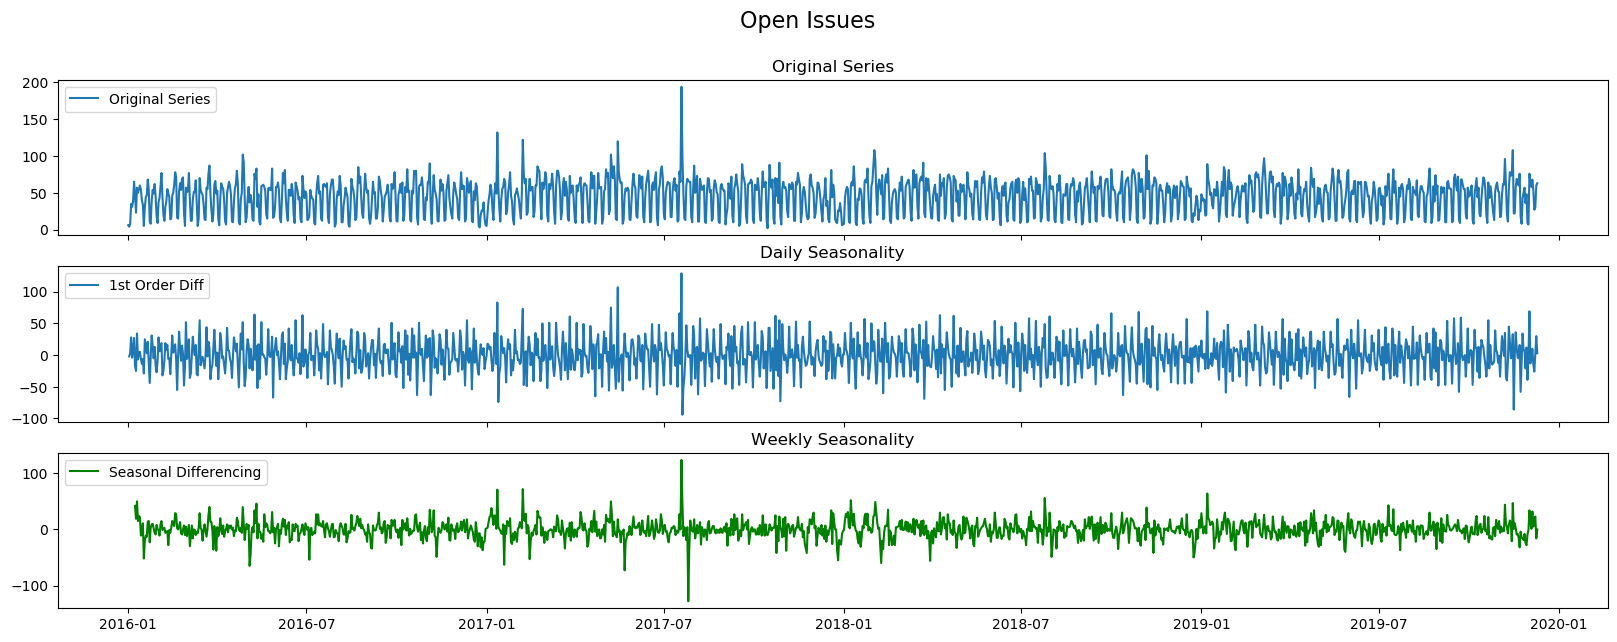

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12075.305, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11712.935, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12073.384, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12017.775, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=11563.505, Time=1.24 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.54 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11638.450, Time=1.14 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=11557.003, Time=2.33 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11707.122, Time=0.97 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=11553.864, Ti

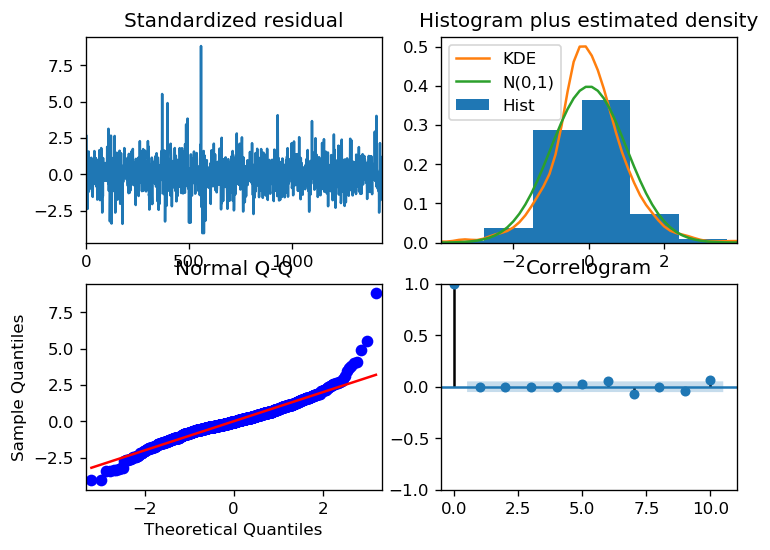

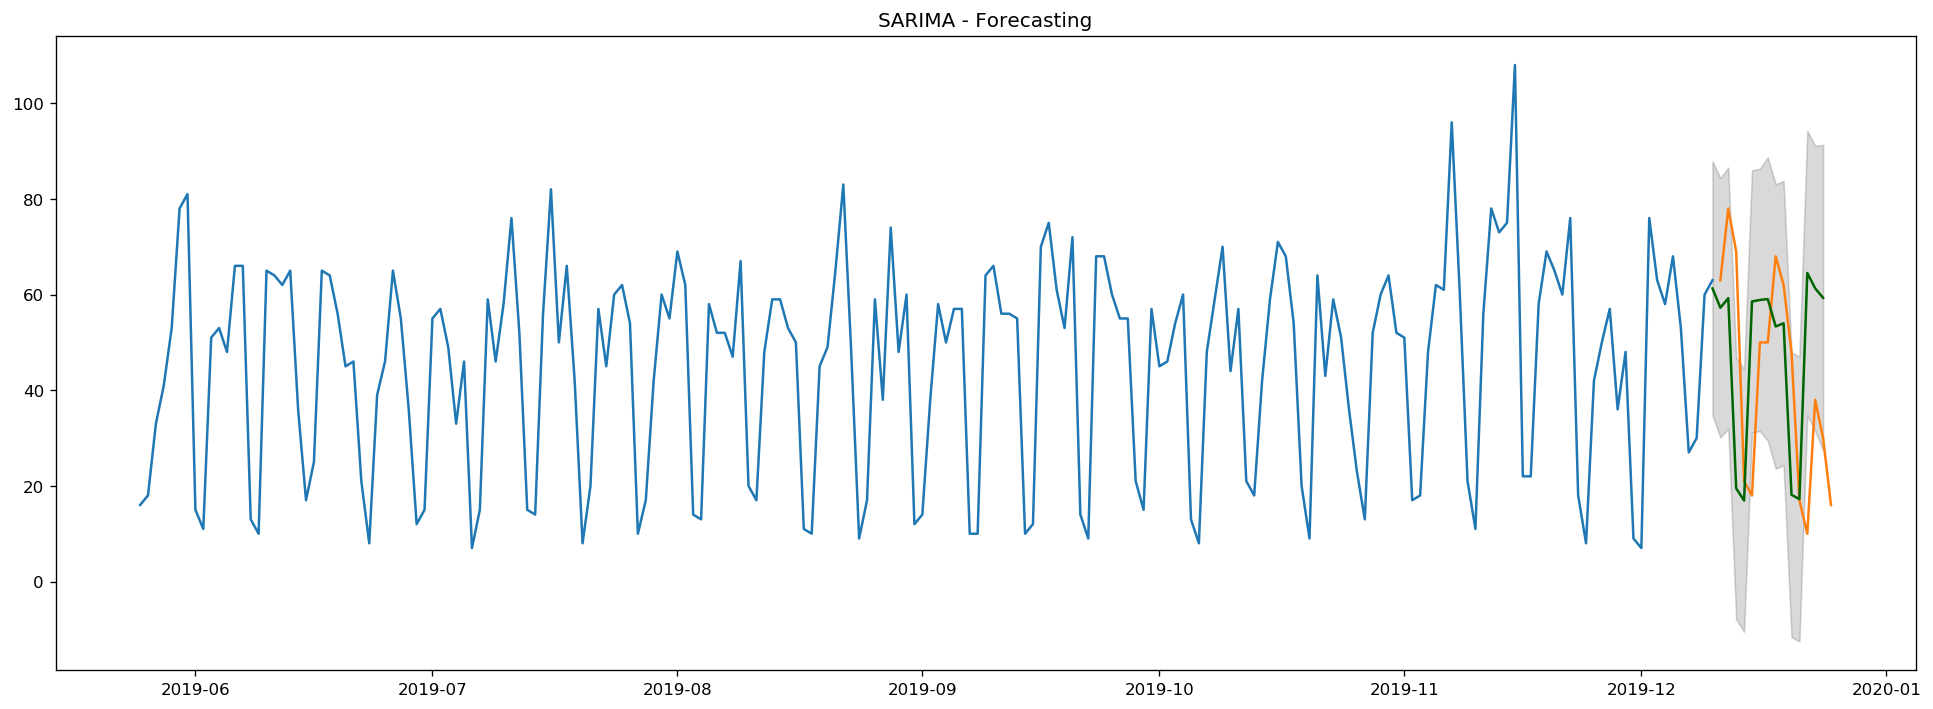

The RMSE values for Experiment 1.13 : 17.29
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.14 Input Length: 1440 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


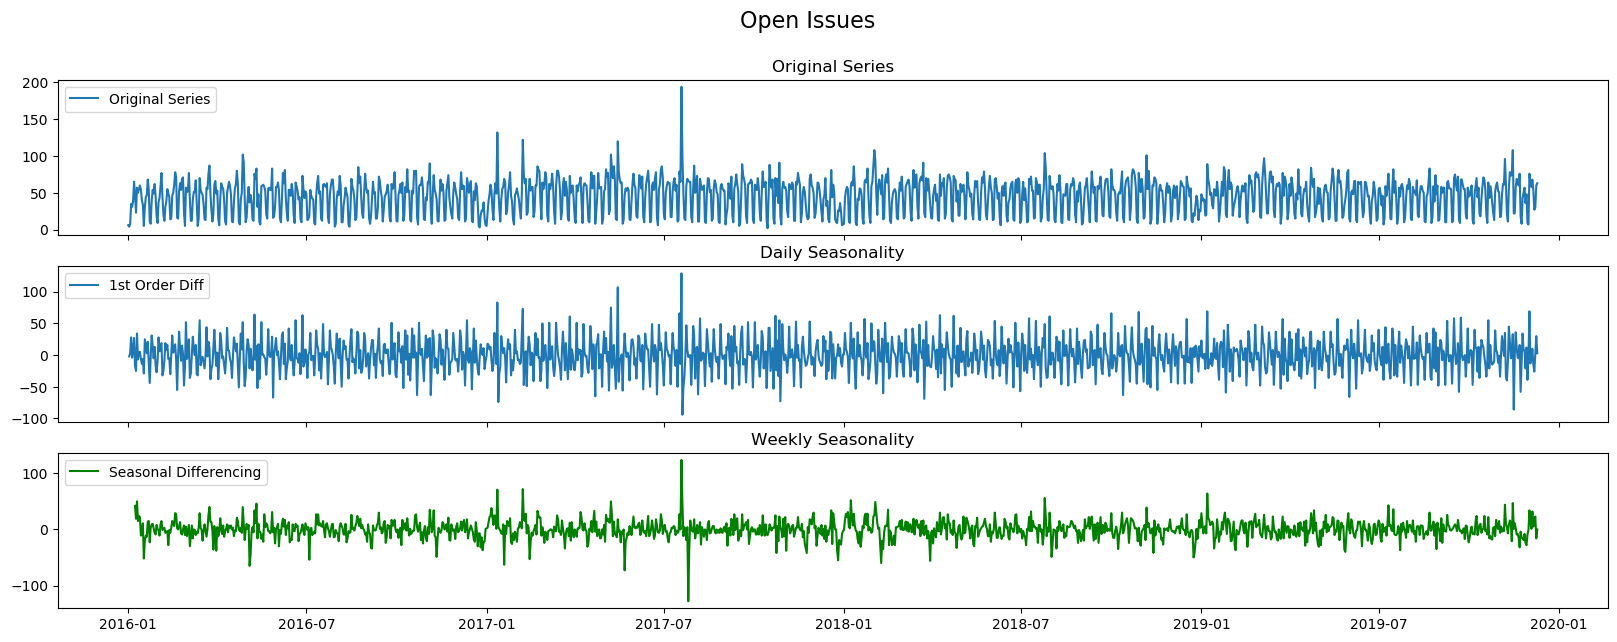

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12075.305, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11712.935, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12073.384, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12017.775, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=11563.505, Time=1.22 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11638.450, Time=1.14 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=11557.003, Time=2.32 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11707.122, Time=0.93 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=11553.864, Ti

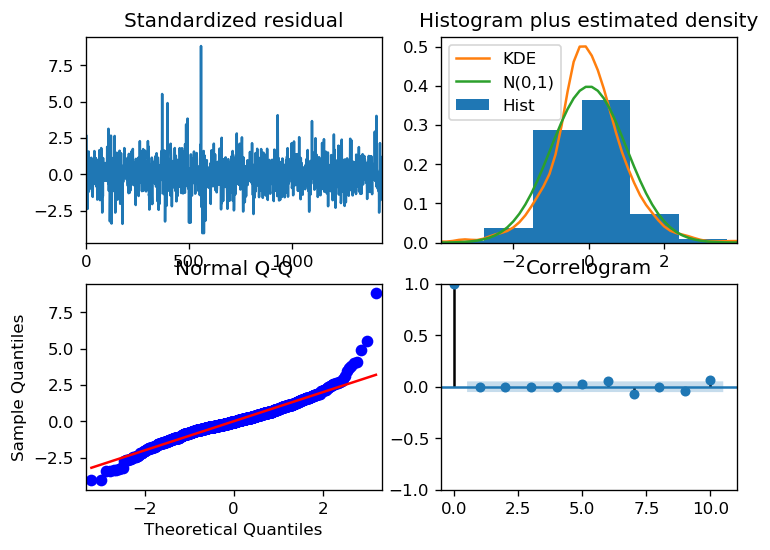

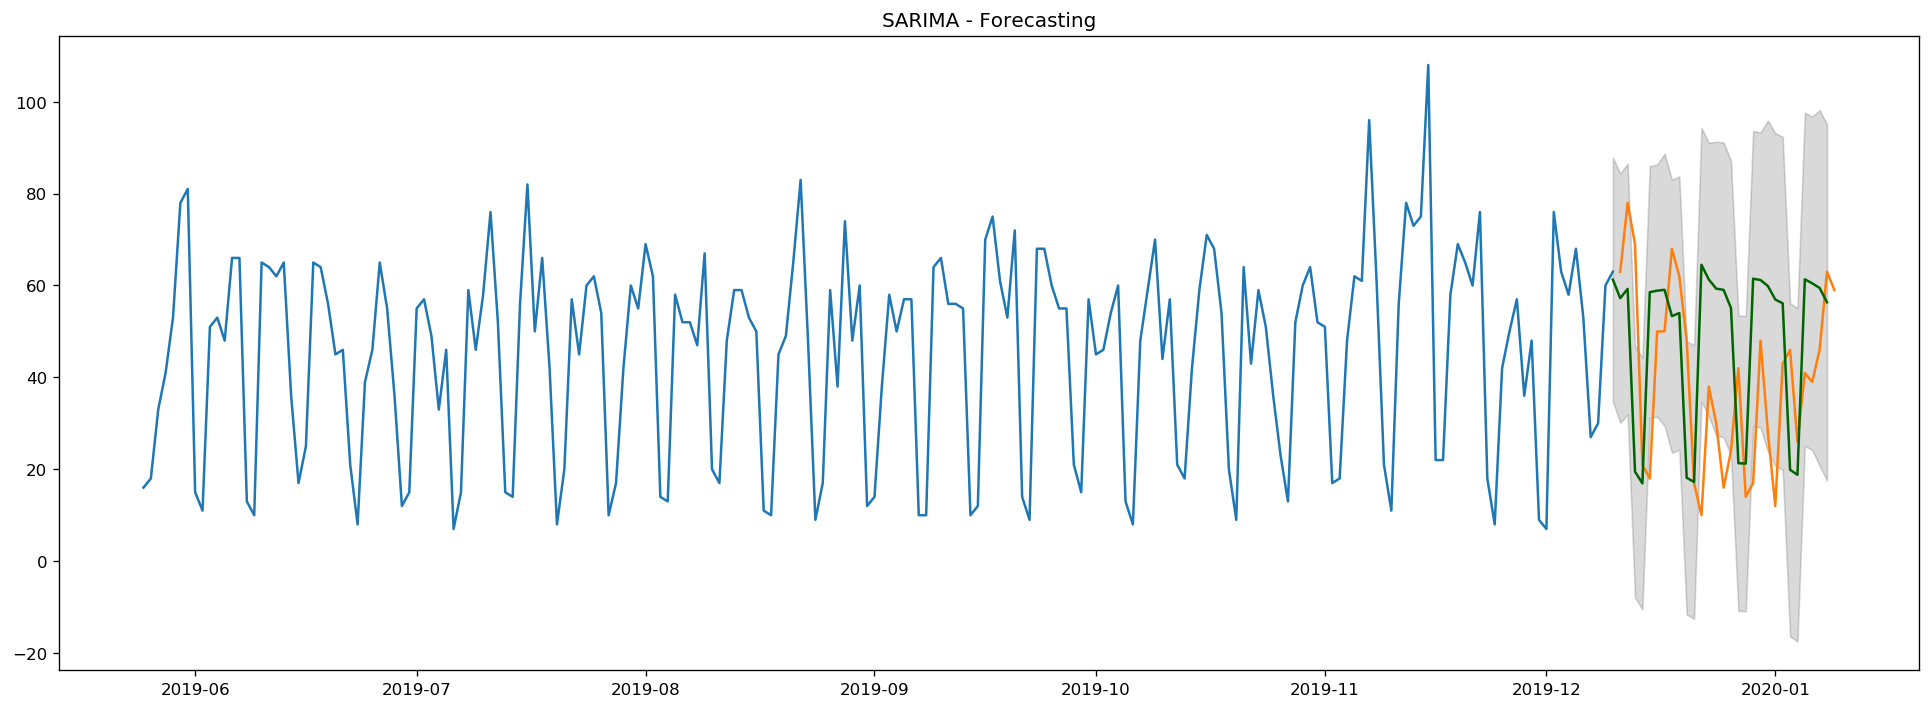

The RMSE values for Experiment 1.14 : 19.23
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.15 Input Length: 1440 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


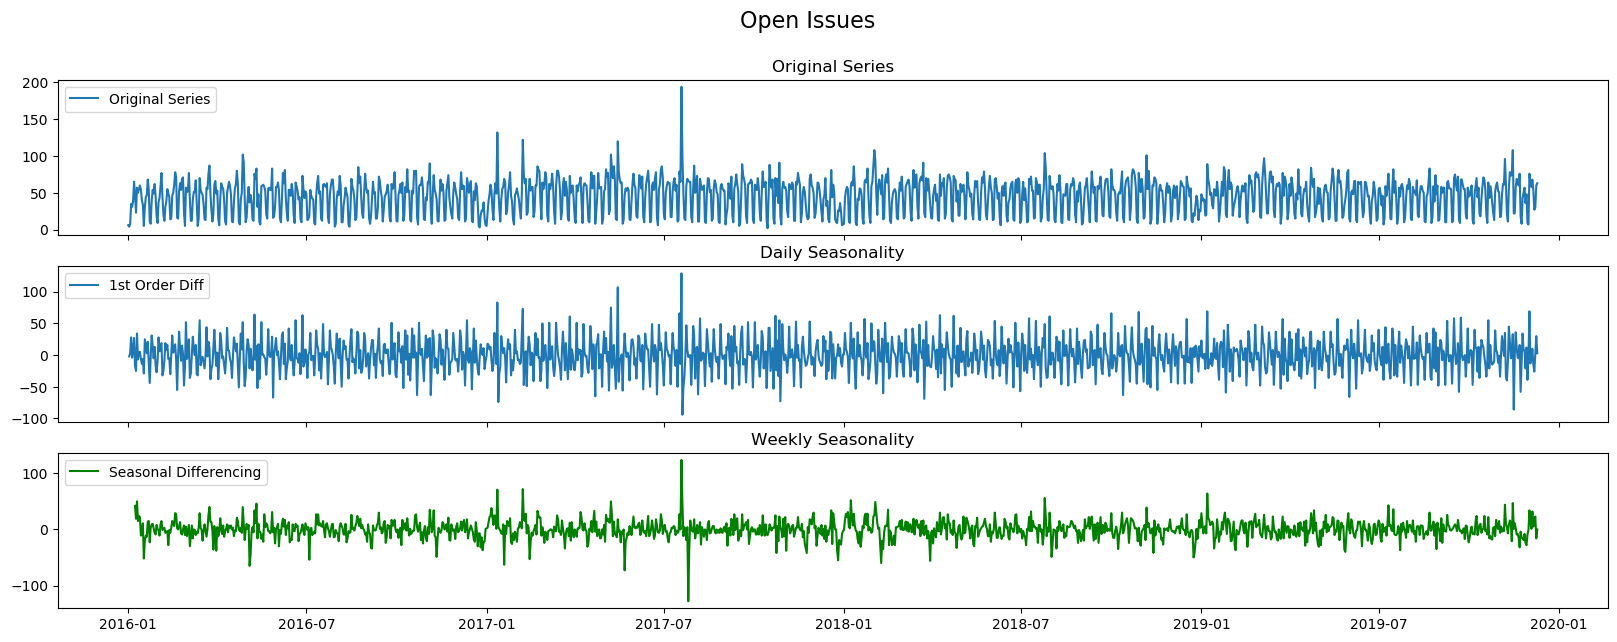

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12075.305, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11712.935, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12073.384, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12017.775, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=11563.505, Time=1.16 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11638.450, Time=1.11 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=11557.003, Time=2.27 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11707.122, Time=0.91 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.00 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=11553.864, Ti

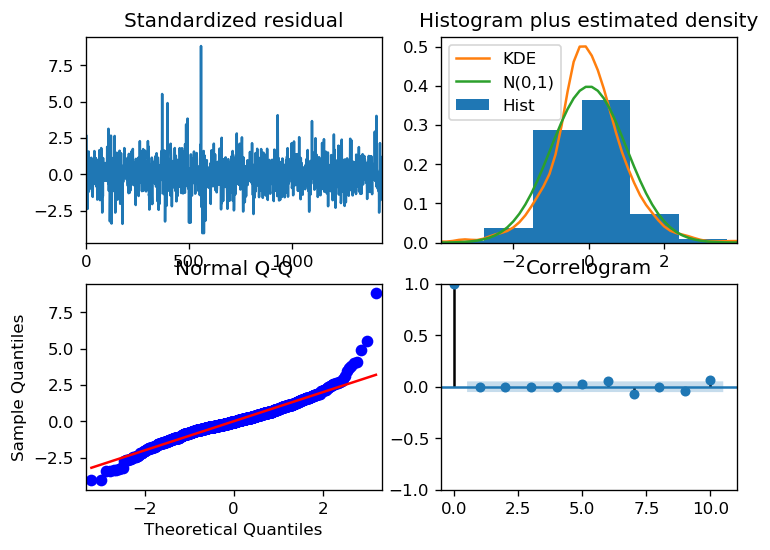

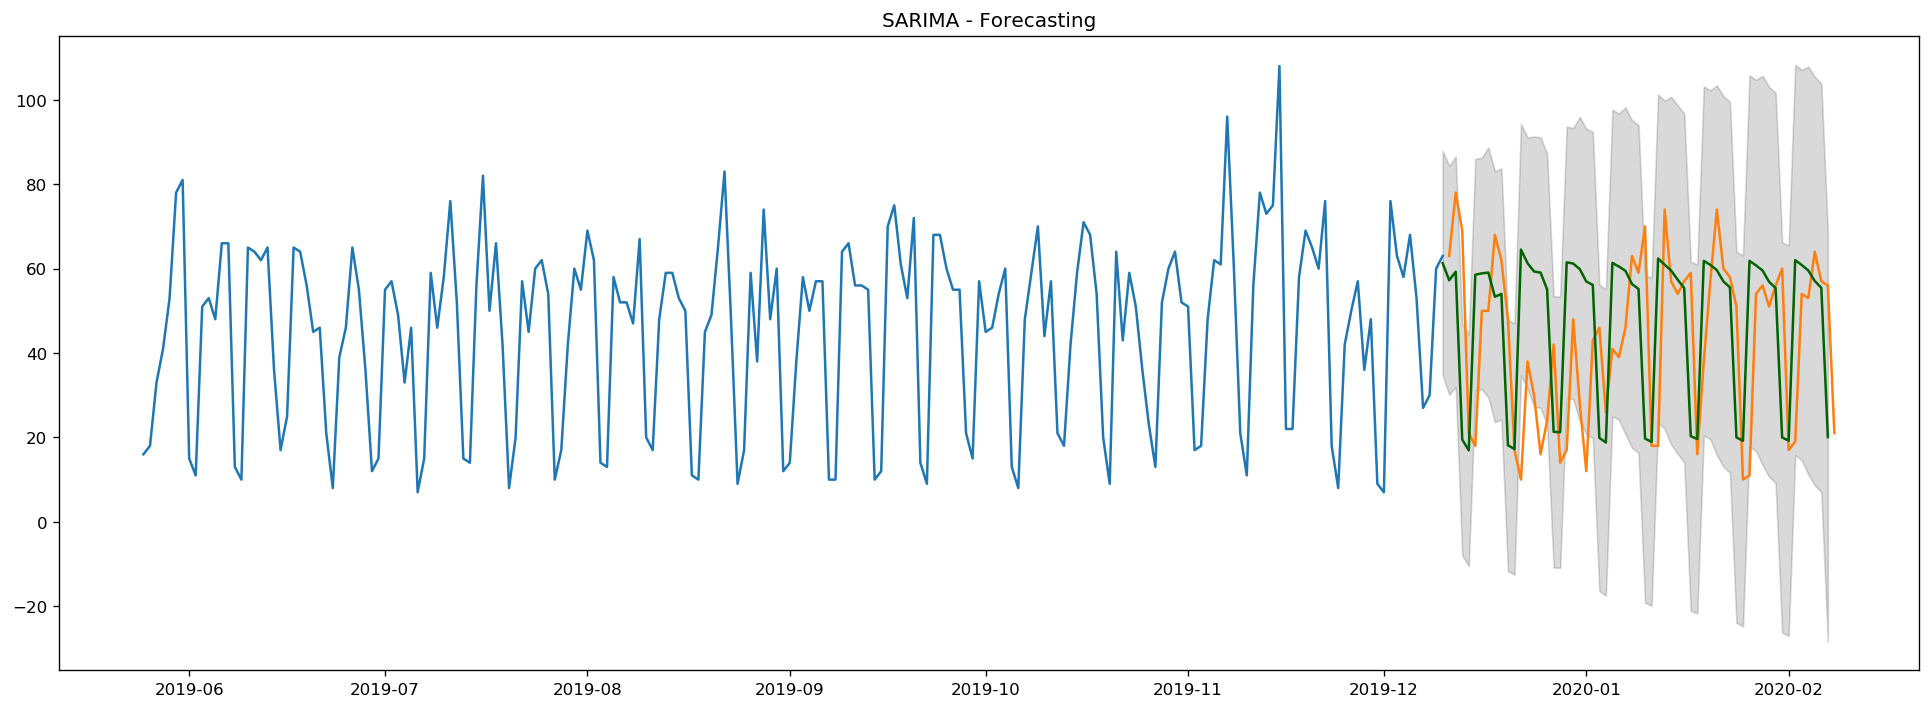

The RMSE values for Experiment 1.15 : 14.48
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 1.16 Input Length: 1440 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


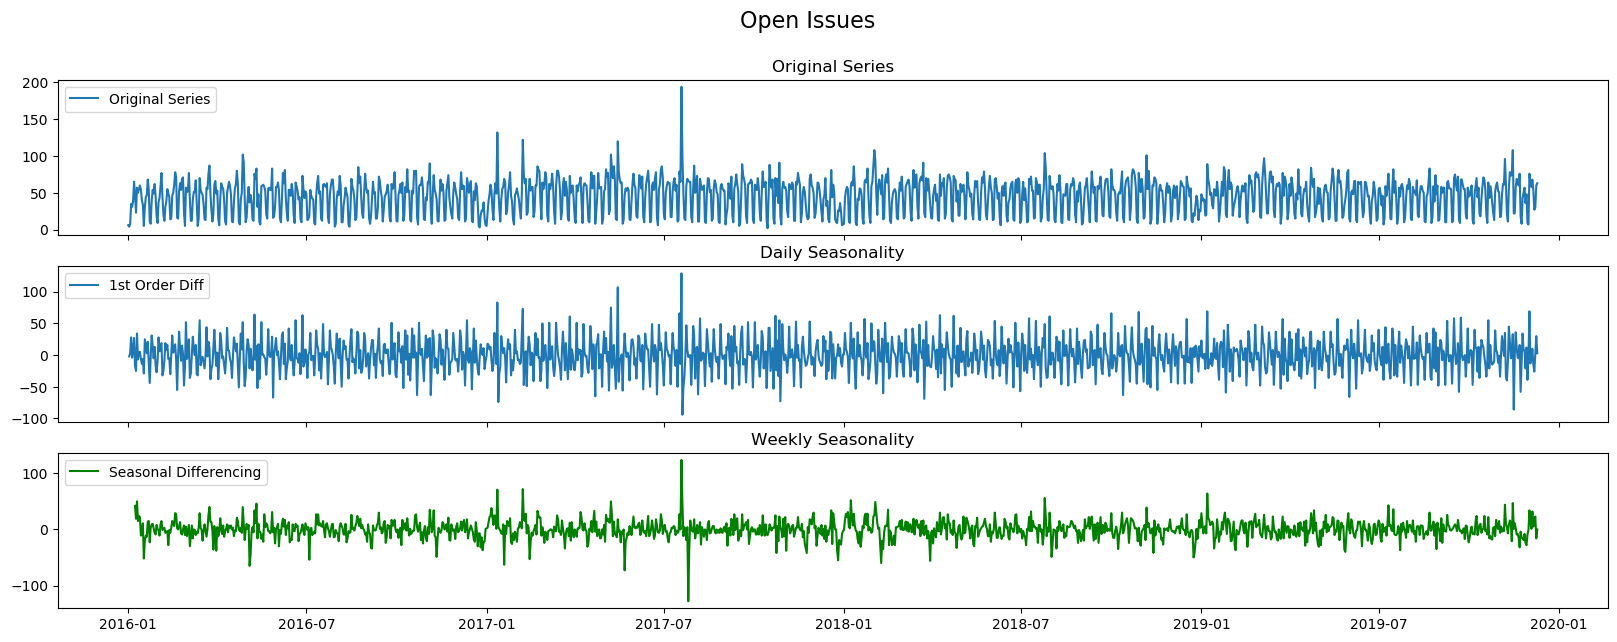

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12075.305, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11712.935, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12073.384, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12017.775, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=11563.505, Time=1.21 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11638.450, Time=1.16 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=11557.003, Time=2.37 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11707.122, Time=0.94 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.13 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=11553.864, Ti

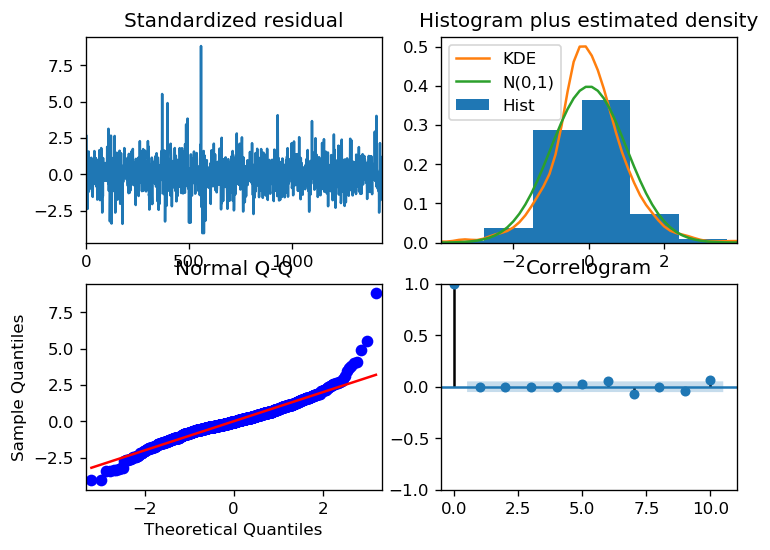

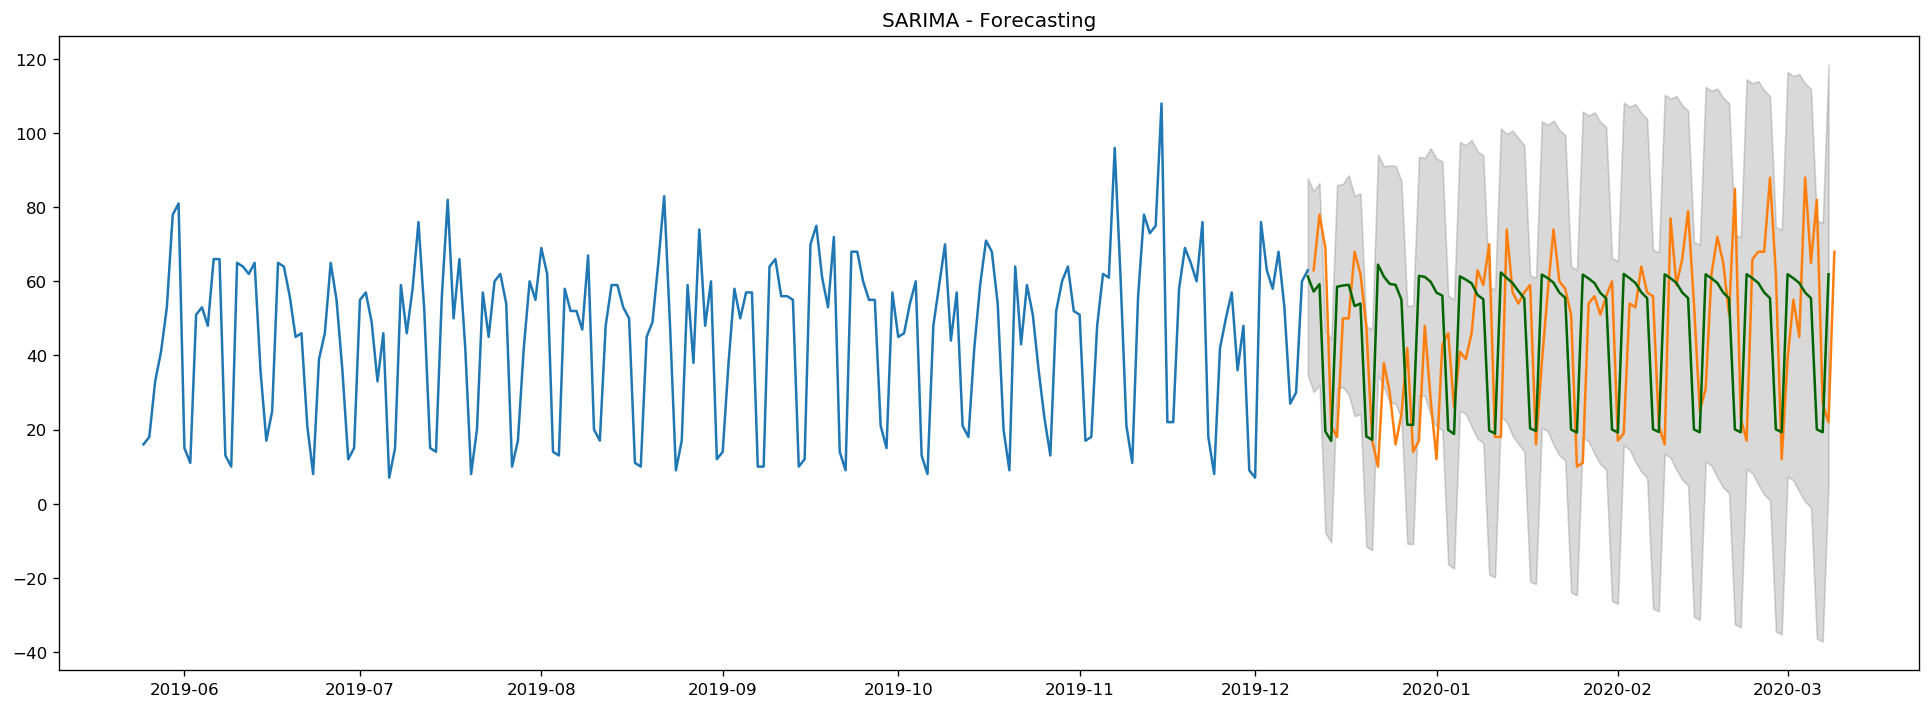

The RMSE values for Experiment 1.16 : 14.2


In [5]:
cnt = 0
for short_input in short_input_list:
    for short_output in short_output_list:
        
        exp_no = experiment_number_list[cnt]
        cnt += 1
        repeat = 150
        print("X" * repeat)
        print("Experiment:",exp_no,"Input Length:", short_input, "Output Length:", short_output)
        print("X" * repeat)
        
        train_len = short_input
        n_periods = short_output

        data_df_open = data_df.Open
        data = data_df_open.head(train_len)

        plot_diff(data)
        smodel = build_ARIMA(data)
        model_diagnostics(smodel)
        fitted_series, lower_series, upper_series = predict_ARIMA(smodel, n_periods, data)
        plot_prediction(data, data_df_open, train_len, n_periods, lower_series, upper_series)
        print_RMSE(data_df_open, fitted_series, train_len, n_periods , exp_no)
        

In [7]:
result = pd.DataFrame([RMSE_DICT.keys(), RMSE_DICT.values()]).T
result.columns = ["Experiement", "RMSE"]
result

Experiement   RMSE
0          1.1   8.31
1          1.2   12.2
2          1.3  13.54
3          1.4  12.72
4          1.5  21.65
5          1.6  21.82
6          1.7  19.98
7          1.8  18.21
8          1.9  21.42
9         1.10  19.13
10        1.11  21.15
11        1.12  19.19
12        1.13  17.29
13        1.14  19.23
14        1.15  14.48
15        1.16   14.2

# End of ARIMA